PIP INSTALLING THE RELEVANT LIBRARIES

In [ ]:
%pip install newsapi-python
%pip install serpapi
%pip install yfinance
%pip install yahooquery
%pip install nltk
%pip install autots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.3/826.3 kB 5.5 MB/s eta 0:00:00


# Analysis of Cryptocurrency News Sentiment

## Objective
The objective of this analysis is to fetch news articles related to Bitcoin, Ethereum, and Ripple using the News API, analyze the sentiment of these articles, and visualize the sentiment distributions for each cryptocurrency.

## Methodology
1. **Fetching News Articles**: We utilize the News API to fetch news articles for Bitcoin, Ethereum, and Ripple. For each cryptocurrency, we retrieve the titles and descriptions of the top news articles based on relevance.

2. **Sentiment Analysis**: We perform sentiment analysis on the fetched news articles to determine their polarity (positive, negative, or neutral). We use the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from the NLTK (Natural Language Toolkit) library. The sentiment analysis provides us with a compound sentiment score for each article, which we use to categorize the sentiment as positive, negative, or neutral.

3. **Visualization**: We visualize the sentiment distributions for Bitcoin, Ethereum, and Ripple using bar charts. The sentiment distribution indicates the number of articles falling under each sentiment category (positive, negative, or neutral).

## Results
The sentiment distribution charts provide insights into the overall sentiment surrounding each cryptocurrency based on the news articles retrieved. The charts help us understand the sentiment trends and potential market impact associated with Bitcoin, Ethereum, and Ripple.

## Conclusion
By analyzing the sentiment of news articles, we gain valuable insights into the public perception and market sentiment surrounding different cryptocurrencies. This information can be utilized by traders, investors, and analysts to make informed decisions regarding cryptocurrency investments and trading strategies.



IMPORTING LIBRARIES, INITIALIZING NEWS API CLIENT


In [ ]:
from newsapi import NewsApiClient
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize News API client
newsapi = NewsApiClient(api_key='b0de9201606a4e38b5c98a3b1ec70f5d')

# Function to fetch news articles for a given query
def fetch_articles(query):
    all_articles = newsapi.get_everything(
        q=query,
        language='en',
        sort_by='relevancy',
        page=1
    )

    formatted_articles = []
    for article in all_articles['articles']:
        title = article['title']
        description = article['description']
        formatted_text = f"Title: {title}\nDescription: {description}"
        formatted_articles.append(formatted_text)

    return formatted_articles

FUNCTION TO ANALYZE SENTIMENT OF A GIVEN TEXT

In [ ]:
# Function to analyze sentiment of a given text
def analyze_sentiment(text):
    SIA = SentimentIntensityAnalyzer()
    sentiment_score = SIA.polarity_scores(text)['compound']
    if sentiment_score >= 0.5:
        return 'Positive'
    elif sentiment_score <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'


FUNCTION TO PLOT SENTIMENT DISTRIBUTION 

In [ ]:
# Function to plot sentiment distribution
def plot_sentiment_distribution(sentiment_counts, title):
    labels = list(sentiment_counts.keys())
    values = list(sentiment_counts.values())

    plt.bar(labels, values, color=['green', 'red', 'grey'])
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Articles')
    plt.show()


FETCHING NEWS ARTICLES FOR BITCOIN, ETHEREUM AND RIPPLE

In [ ]:
# Fetch news articles for Bitcoin, Ethereum, and Ripple
bitcoin_articles = fetch_articles('Bitcoin')
ethereum_articles = fetch_articles('Ethereum')
ripple_articles = fetch_articles('Ripple')


ANALYZING SENTIMENT FOR EACH SET OF ARTICLES

In [ ]:
# Analyze sentiment for each set of articles
bitcoin_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0}
ethereum_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0}
ripple_sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

for article_text in bitcoin_articles:
    sentiment = analyze_sentiment(article_text)
    bitcoin_sentiment_counts[sentiment] += 1

for article_text in ethereum_articles:
    sentiment = analyze_sentiment(article_text)
    ethereum_sentiment_counts[sentiment] += 1

for article_text in ripple_articles:
    sentiment = analyze_sentiment(article_text)
    ripple_sentiment_counts[sentiment] += 1


PLOTTING SENTIMENT DISTRIBUTION FOR EACH CRYPTOCURRENCY

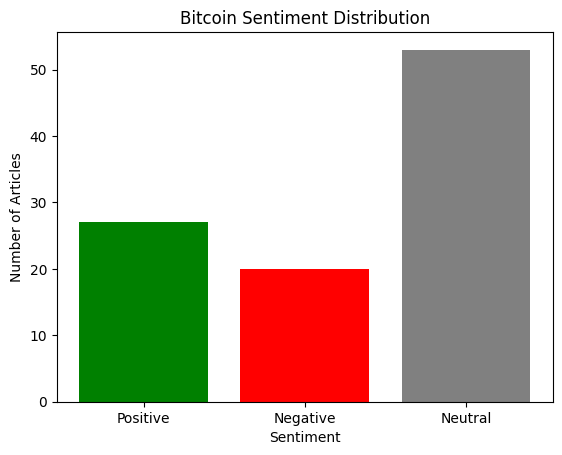

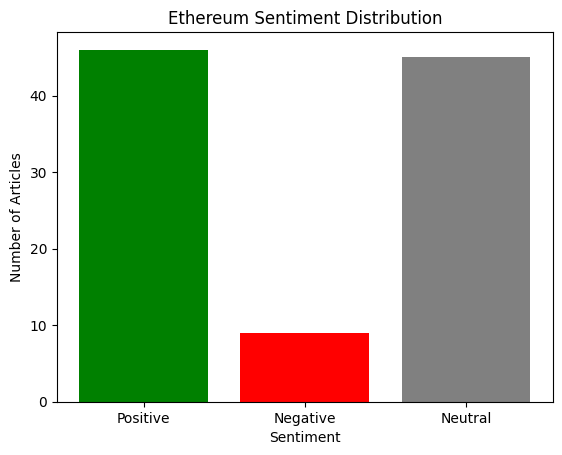

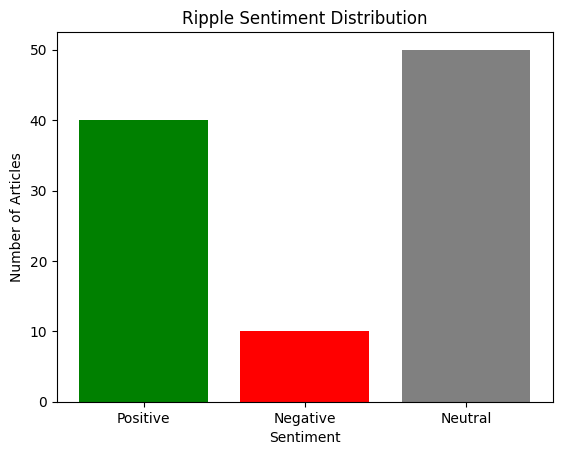

In [ ]:
# Plot sentiment distribution for each cryptocurrency
plot_sentiment_distribution(bitcoin_sentiment_counts, 'Bitcoin Sentiment Distribution')
plot_sentiment_distribution(ethereum_sentiment_counts, 'Ethereum Sentiment Distribution')
plot_sentiment_distribution(ripple_sentiment_counts, 'Ripple Sentiment Distribution')

# Next Steps Based on Ethereum's Positive Sentiment

## Analysis Overview
Based on our sentiment analysis of news articles related to Bitcoin, Ethereum, and Ripple, we have observed that Ethereum has the most positive sentiment among the three cryptocurrencies.

## Proposed Action
Given the positive sentiment surrounding Ethereum, we propose to proceed with the following steps:

1. **Price Data Retrieval**: We will retrieve historical price data for Ethereum from Yahoo Finance using the `yfinance` Python library. This data will include historical open, high, low, close prices, as well as trading volume and other relevant metrics.

2. **Price Prediction**: Utilizing the obtained historical price data, we will attempt to predict the price of Ethereum for the next 30 days using machine learning techniques. By analyzing past price trends and relevant features, we aim to forecast future price movements.

3. **Model Training**: We will train a machine learning model using the historical price data and additional features such as trading volume, market capitalization, and sentiment scores. The model will learn patterns and relationships in the data to make accurate predictions of Ethereum's future price trends.

4. **Evaluation and Validation**: We will evaluate the performance of the trained model using validation techniques such as cross-validation and backtesting. This will help ensure the reliability and accuracy of the price predictions.

5. **Decision Making**: Based on the predictions generated by the model and our analysis of market conditions, we will make informed decisions regarding Ethereum investments or trading strategies. We will consider factors such as risk tolerance, investment objectives, and market trends to determine the appropriate course of action.

## Conclusion
By leveraging the positive sentiment surrounding Ethereum and employing machine learning techniques for price prediction, we aim to capitalize on potential opportunities in the cryptocurrency market. Our objective is to enhance investment decision-making and maximize returns by leveraging data-driven insights and predictive analytics.



IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

ACCESSING TODAY'S DATE

In [ ]:
today = date.today()

In [ ]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2= date.today()- timedelta(days = 768)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

DOWNLOADING HISTORICAL DATA FOR 'ETH-USD' USING YFINANCE

In [ ]:
# Download historical data for 'ETH-USD' using yfinance
data = yf.download('ETH-USD',
                   start = start_date,
                   end = end_date,
                   progress = False)
# Add a 'Date' column based on the index
data['Date']= data.index
# Reorder columns to a specific sequence
data = data [['Date','Open','High','Low', 'Close', 'Adj Close', 'Volume']]
# Reset index and drop the existing index column
data.reset_index(drop = True, inplace = True)

In [ ]:
print(data.head(5))

        Date         Open         High          Low        Close    Adj Close  \
0 2022-02-09  3121.182617  3263.155762  3063.160156  3239.457031  3239.457031   
1 2022-02-10  3240.113037  3271.316162  3070.378174  3077.482178  3077.482178   
2 2022-02-11  3077.413086  3127.450684  2888.707764  2927.383545  2927.383545   
3 2022-02-12  2927.386475  2980.079346  2870.177002  2917.362793  2917.362793   
4 2022-02-13  2916.789551  2947.776611  2845.397705  2883.463379  2883.463379   

        Volume  
0  13951308490  
1  18629485080  
2  16043881065  
3  11254355757  
4   9054963563  


In [ ]:
print(data.tail())

          Date         Open         High          Low        Close  \
763 2024-03-13  3980.265137  4083.007324  3936.627197  4006.457031   
764 2024-03-14  4005.745117  4011.102783  3721.788574  3883.140381   
765 2024-03-15  3882.856934  3928.775635  3571.774658  3735.220215   
766 2024-03-16  3736.104980  3780.894531  3468.079346  3522.860107   
767 2024-03-17  3523.029785  3676.263428  3414.172363  3642.413086   

       Adj Close       Volume  
763  4006.457031  22028114691  
764  3883.140381  25434810823  
765  3735.220215  33505075433  
766  3522.860107  20199855932  
767  3642.413086  19938757095  


In [ ]:
data.shape

(768, 7)

In [ ]:
# Import necessary libraries
import plotly.graph_objects as go
# Create a Candlestick chart using Plotly
figure = go.Figure(data= [go.Candlestick(x= data['Date'],
                                         open = data['Open'],
                                         high = data['High'],
                                         low = data['Low'],
                                         close = data['Close'])])
#customize the layout
figure.update_layout(title = "ETHEREUM PRICE ANALYSIS",
                     xaxis_rangeslider_visible = False)
figure.show()

In [ ]:
correlation = data.corr()
print(correlation['Close'].sort_values(ascending = False))

Close        1.000000
Adj Close    1.000000
High         0.997108
Low          0.996954
Open         0.993558
Volume       0.315760
Name: Close, dtype: float64


<ipython-input-50-19724c5c63bc>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



We opted briefly for AutoTS for our forecasting task due to its automated model selection, ensemble forecasting, flexibility in forecast length, frequency inference, and ease of use. With AutoTS, we can streamline the process of selecting the most suitable forecasting model, enhance prediction accuracy through ensemble techniques, specify the forecast length according to our needs, handle various data frequencies effortlessly, and navigate the workflow efficiently. These features align well with our requirements for generating accurate predictions of Ethereum's price movements, enabling informed decision-making and effective trading strategies.

In [ ]:
from autots import AutoTS
# Fit the AutoTS model
model = AutoTS(forecast_length= 30, frequency = 'infer', ensemble= 'simple')
model.fit(data, date_col= "Date", value_col= "Close", id_col =None)
# Make predictions
prediction = model.predict()
forecast =prediction.forecast
print(forecast)

Using 1 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 20
Epoch 1/50
24/24 [==============================] - 7s 6ms/step - loss: 0.4100
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3957
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 0.3750
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3671
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3590
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3561
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3551
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3542
Epoch 9/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3530
Epoch 10/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3512
Epoch 11/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3483
Epoch 12/50
24/24 [==============================] - 0s 4ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

ERROR:prophet.plot:Importing matplotlib failed. Plotting will not work.


Model Number: 31 with model FBProphet in generation 0 of 20


DEBUG:cmdstanpy:input tempfile: /tmp/tmpylpww35e/lugk175t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpylpww35e/7jqjc28a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49418', 'data', 'file=/tmp/tmpylpww35e/lugk175t.json', 'init=/tmp/tmpylpww35e/7jqjc28a.json', 'output', 'file=/tmp/tmpylpww35e/prophet_modelgegxe30z/prophet_model-20240318092809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 32 with model MultivariateRegression in generation 0 of 20
Model Number: 33 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 20
Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Model Number: 39 with model ETS in generation 0 of 20
Model Number: 40 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 40 in generation 0: VECM
Model Number: 41 wi

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide



Model Number: 65 with model UnobservedComponents in generation 0 of 20
Model Number: 66 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 66 in generation 0: VAR
Model Number: 67 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 67 in generation 0: VECM
Model Number: 68 with model ARIMA in generation 0 of 20
Template Eval Error: Exception("Transformer AnomalyRemoval failed on fit from params fake_date {'0': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': 'KNNImputer', 'transformations': {'0': 'STLFilter', '1': 'Round'}, 'transformation_params': {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}}}, 'isolated_only': False}, '1': {'output_distribution': 'normal', 'n_quantiles': 100}, '2': {'fix

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 70 with model DatepartRegression in generation 0 of 20
Model Number: 71 with model UnivariateRegression in generation 0 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on inverse from params ffill {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'fixed': False, 'window': 3}, '2': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}}") in model 71 in generation 0: UnivariateRegression
Model Number: 72 with model MultivariateRegression in generation 0 of 20
Template Eval Error: XGBoostError('[09:28:15] /workspace/src/objective/regression_obj.cu:343: PoissonRegression: label must be nonnegative\nStack trace:\n  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xa8dc0a) [0x7af83aaedc0a]\n  [bt] (1) /usr/local/lib/python3.10/dist-packages/

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Template Eval Error: LightGBMError('[poisson]: at least one target label is negative') in model 86 in generation 0: WindowRegression
Model Number: 87 with model ConstantNaive in generation 0 of 20
Model Number: 88 with model Theta in generation 0 of 20
Model Number: 89 with model DatepartRegression in generation 0 of 20
Model Number: 90 with model GLM in generation 0 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 90 in generation 0: GLM
Model Number: 91 with model VAR in generation 0 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params mean {'0': {'n_harmonics': 10, 'detrend': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '3': {'window_size': 30, 'alpha': 2.5, 'grouping_forward_limit': 4, 'max_level_shifts': 30, 'alignment

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log



Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '4': {}, '5': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 4, 'deriv': 0, 'mode': 'nearest'}}}") in model 96 in generation 0: Theta
Model Number: 97 with model UnobservedComponents in generation 0 of 20
Model Number: 98 with model FBProphet in generation 0 of 20
Model Number: 99 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 99 in generation 0: ARCH
Model Number: 100 with model VAR in generation 0 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'highpass', 'analog': False, 'outp

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 104 with model UnobservedComponents in generation 0 of 20
Model Number: 105 with model SeasonalNaive in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 105 in generation 0: SeasonalNaive
Model Number: 106 with model ARDL in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 106 in generation 0: ARDL
Model Number: 107 with model LastValueNaive in generation 0 of 20
Model Number: 108 with model UnobservedComponents in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no futur

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': 900, 'transform_dict': None}, '2': {'method': 'clip', 'std_threshold': 4.5, 'fillna': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 117 in generation 0: DatepartRegression
Model Number: 118 with model Theta in generation 0 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on inverse from params zero {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {}, '2': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'bkfilter'}, 'transformation_params': {'0': {}}}, 'holiday_countries_used': True}}") in model 118 in generation 0: Theta
Model Number: 119 with model GLS

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

inv

Model Number: 125 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 125 in generation 0: VAR
Model Number: 126 with model UnivariateRegression in generation 0 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params nearest {'0': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.25}}, '1': {}}") in model 126 in generation 0: UnivariateRegression
Model Number: 127 with model AverageValueNaive in generation 0 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params pchip {'0': {'method': 'butter', 'method_args': {'N': 4, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.017241379310344827}}, '1': {'discretization': 'upper', 'n_bins': 5}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 127 in generation 0: AverageValueNaive
Model Number: 128 w

09:28:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {}, '1': {}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': True, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}}, '3': {'method': 'butter', 'method_args': {'N': 2, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.011904

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+07, tolerance: 1.994e+04



Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'average'}, '4': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 162 in generation 0: ARIMA
Model Number: 163 with model UnivariateMotif in generation 0 of 20
Model Number: 164 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch`

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid value encountered in multiply



Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 175 in generation 0: UnobservedComponents
Model Number: 176 with model NVAR in generation 0 of 20
Model Number: 177 with model SeasonalityMotif in generation 0 of 20
Model Number: 178 with model LastValueNaive in generation 0 of 20
Model Number: 179 with model UnivariateMotif in generation 0 of 20
Model Number: 180 with model SeasonalityMotif in generation 0 of 20
Model Number: 181 with model UnobservedComponents in generation 0 of 20
New Generation: 1 of 20
Model Number: 182 with model UnivariateMotif in generation 1 of 20
Model Number: 183 with model UnobservedComponents in generation 1 of 20
Model Number: 184 with model SeasonalityMotif in generation 1 of 20
Model Number: 185 with model UnobservedComponents in generation 1 of 20
Model Number: 186 with model SeasonalNaive in generation 1 of 20
Model Number: 187 with model NVAR in generation 1 of 20
Template Eval Error: Exception("Trans

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning:

inv

Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'whiten': False}, '1': {'part': 'trend', 'lamb': 6.25}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': True}, '3': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 3, 'max_level_shifts': 5, 'alignment': 'last_value'}, '4': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '5': {'lag_1': 7, 'method': 'Mean'}}") in model 211 in generation 1: FBProphet
Model Number: 212 with model MetricMotif in generation 1 of 20
Model Number: 213 with model MultivariateRegression in generation 1 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 214 with model NVAR in generation 1 of 20
Model Number: 215 with model UnobservedComponents in generation 1 of 20
Model Number: 216 with model UnobservedComponents in generation 1 of 20
Model Number: 217 with model FBProphet in generation 1 of 20
No anomalies detected.
Model Number: 218 with model LastValueNaive in generation 1 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params mean {'0': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.08333333333333333}}, '1': {'window_size': 30, 'alpha': 3.5, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'average'}}") in model 218 in generation 1: LastValueNaive
Model Number: 219 with model ETS in generation 1 of 20
Model Number: 220 with model SeasonalNaive in generation 1 of 20
Model Number: 221 with model WindowRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regres

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00



Model Number: 227 with model GLM in generation 1 of 20
Model Number: 228 with model DatepartRegression in generation 1 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 229 with model Theta in generation 1 of 20
Model Number: 230 with model ETS in generation 1 of 20
Model Number: 231 with model SectionalMotif in generation 1 of 20


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 231 in generation 1: SectionalMotif
Model Number: 232 with model MultivariateRegression in generation 1 of 20
Model Number: 233 with model FBProphet in generation 1 of 20
Model Number: 234 with model NVAR in generation 1 of 20
Model Number: 235 with model UnobservedComponents in generation 1 of 20
Model Number: 236 with model Theta in generation 1 of 20
Model Number: 237 with model MultivariateMotif in generation 1 of 20
Model Number: 238 with model MultivariateRegression in generation 1 of 20
Model Number: 239 with model UnobservedComponents in generation 1 of 20
Model Number: 240 with model WindowRegression in generation 1 of 20
Model Number: 241 with model LastValueNaive in generation 1 of 20
Model Number: 242 with model MultivariateRegression in generation 1 of 20
Template Eval Error: KeyError('model') in model 242 in generation 1: MultivariateRegression
M

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 245 with model SeasonalNaive in generation 1 of 20
Model Number: 246 with model UnivariateRegression in generation 1 of 20
Model Number: 247 with model ETS in generation 1 of 20
Model Number: 248 with model SeasonalityMotif in generation 1 of 20
Model Number: 249 with model SeasonalityMotif in generation 1 of 20
Model Number: 250 with model Theta in generation 1 of 20
Model Number: 251 with model DatepartRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 251 in generation 1: DatepartRegression
Model Number: 252 with model LastValueNaive in generation 1 of 20
Model Number: 253 with model ConstantNaive in generation 1 of 20
Model Number: 254 with model AverageValueNaive in generation 1 of 20
Model Number: 255 with model WindowRegression in generation 1 of 20
Model Number: 256 with model GLS in generation 1 of 20
Model Number: 257 with model ARDL in generation 1 of 20
Model Number: 258 with model

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 259 with model NVAR in generation 1 of 20
Model Number: 260 with model SeasonalityMotif in generation 1 of 20
Model Number: 261 with model UnobservedComponents in generation 1 of 20
Model Number: 262 with model FBProphet in generation 1 of 20
Model Number: 263 with model Theta in generation 1 of 20
Model Number: 264 with model SectionalMotif in generation 1 of 20
Model Number: 265 with model SeasonalNaive in generation 1 of 20
Model Number: 266 with model FBProphet in generation 1 of 20
Model Number: 267 with model MultivariateMotif in generation 1 of 20
Model Number: 268 with model SeasonalNaive in generation 1 of 20
Model Number: 269 with model AverageValueNaive in generation 1 of 20
Model Number: 270 with model LastValueNaive in generation 1 of 20
Model Number: 271 with model MultivariateMotif in generation 1 of 20
Model Number: 272 with model LastValueNaive in generation 1 of 20
Model Number: 273 with model GLS in generation 1 of 20
Model Number: 274 with model Datepa

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 275 with model UnivariateMotif in generation 1 of 20
Model Number: 276 with model ConstantNaive in generation 1 of 20
Model Number: 277 with model ARDL in generation 1 of 20
Model Number: 278 with model SeasonalNaive in generation 1 of 20
Model Number: 279 with model LastValueNaive in generation 1 of 20
Model Number: 280 with model FBProphet in generation 1 of 20
Model Number: 281 with model ConstantNaive in generation 1 of 20
Model Number: 282 with model FBProphet in generation 1 of 20
Model Number: 283 with model ARIMA in generation 1 of 20
Model Number: 284 with model ETS in generation 1 of 20
Model Number: 285 with model GLS in generation 1 of 20
Model Number: 286 with model MultivariateMotif in generation 1 of 20
Model Number: 287 with model UnivariateMotif in generation 1 of 20
Model Number: 288 with model WindowRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 288 in generation 1: Wind

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 296 with model UnobservedComponents in generation 1 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.



Model Number: 297 with model AverageValueNaive in generation 1 of 20
Model Number: 298 with model AverageValueNaive in generation 1 of 20
Model Number: 299 with model LastValueNaive in generation 1 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params mean {'0': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.08333333333333333}}, '1': {}, '2': {'model': 'Linear'}, '3': {}}") in model 299 in generation 1: LastValueNaive
Model Number: 300 with model ARIMA in generation 1 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}, '2': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '3': {}, '4': {}}") in model 300 in generation 1: ARIMA
Model Number: 301 with model SeasonalityMotif in generation 1 of 20
Model Number: 302 with model GLM in generation 1 of

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid value encountered in multiply



Model Number: 305 with model ETS in generation 1 of 20
Model Number: 306 with model AverageValueNaive in generation 1 of 20
New Generation: 2 of 20
Model Number: 307 with model MultivariateRegression in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 308 with model GLS in generation 2 of 20
Model Number: 309 with model Theta in generation 2 of 20
Model Number: 310 with model GLS in generation 2 of 20
Model Number: 311 with model AverageValueNaive in generation 2 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pad {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.1, 'rolling_periods': 28, 'center': False}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': True}, '1': {'det_order': -1, 'k_ar_diff': 0}}") in model 311 in generation 2: AverageValueNaive
Model Number: 312 with model LastValueNaive in generation 2 of 20
Model Number: 313 with model SeasonalNaive in generation 2 of 20
Model Number: 314 with model SeasonalityMotif in generation 2 of 20
Model Number: 315 with model ARIMA in generation 2 of 20
Model Number: 316 with model UnobservedComponents in generation 2 of 20
Model Number: 317 with model Theta in generation 2 of 20
Mo

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning:

overflow encountered in accumulate

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 322 with model GLS in generation 2 of 20
Model Number: 323 with model SeasonalityMotif in generation 2 of 20
Model Number: 324 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 324 in generation 2: DatepartRegression
Model Number: 325 with model GLS in generation 2 of 20
Model Number: 326 with model ARIMA in generation 2 of 20
Model Number: 327 with model WindowRegression in generation 2 of 20
Model Number: 328 with model GLM in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params nearest {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'bkfilter'}, 'transformation_params': {'0': {}}}}, '2': {'lag_1': 7, 'method': 'LastValue'}}") in model 328 in generation 2: GLM
Model Number: 329 with m

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 337 with model MultivariateMotif in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params pad {'0': {}, '1': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': True}, '2': {'lag_1': 60, 'method': 'LastValue'}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}}") in model 337 in generation 2: MultivariateMotif
Model Number: 338 with model AverageValueNaive in generation 2 of 20
Model Number: 339 with model GLS in generation 2 of 20
Model Number: 340 with model MultivariateRegression in generation 2 of 20
Model Number: 341 with model ConstantNaive in generation 2 of 20
Model Number: 342 with model SeasonalNaive in generation 2 of 20
Model Number: 343 with model FBProphet in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'rows': 1,

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 349 with model MultivariateRegression in generation 2 of 20
Model Number: 350 with model UnivariateMotif in generation 2 of 20
Model Number: 351 with model NVAR in generation 2 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}}") in model 351 in generation 2: NVAR
Model Number: 352 with model MetricMotif in generation 2 of 20
Model Number: 353 with model GLS in generation 2 of 20
Model Number: 354 with model SeasonalityMotif in generation 2 of 20
Model Number: 355 with model FBProphet in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 356 with model SectionalMotif in generation 2 of 20
Model Number: 357 with model LastValueNaive in generation 2 of 20
Model Number: 358 with model FBProphet in generation 2 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill {'0': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 7}}") in model 358 in generation 2: FBProphet
Model Number: 359 with model UnobservedComponents in generation 2 of 20
Model Number: 360 with model ETS in generation 2 of 20
Model Number: 361 with model NVAR in generation 2 of 20
Model Number: 362 with model SeasonalityMotif in generation 2 of 20
Model Number: 363 with model UnobservedComponents in generation 2 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params zero {'0': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 27}, '1': {}, '2': {}}") in model 363 in generation 2: UnobservedComponents
Model Number: 364 with model GLM in generation 2 of 20
Template Eval Error:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 366 with model FBProphet in generation 2 of 20
Model Number: 367 with model NVAR in generation 2 of 20
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 367 in generation 2: NVAR
Model Number: 368 with model SeasonalNaive in generation 2 of 20
Model Number: 369 with model ARIMA in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 369 in generation 2: ARIMA
Model Number: 370 with model UnivariateRegression in generation 2 of 20
Model Number: 371 with model AverageValueNaive in generation 2 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pad {'0': {'output_distribution': 'uniform', 'n_quantiles': 246}, '1': {'det_order': -1, 'k_ar_diff': 0}}") in model 371 in generation 2: AverageValueNaive
Model Number: 372 with model GLM in generation 2 of 20
Model Number: 373 with model UnobservedComponents in 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 374 with model Theta in generation 2 of 20
Model Number: 375 with model UnobservedComponents in generation 2 of 20
Model Number: 376 with model SeasonalityMotif in generation 2 of 20
Model Number: 377 with model SeasonalityMotif in generation 2 of 20
Model Number: 378 with model GLM in generation 2 of 20
Model Number: 379 with model UnobservedComponents in generation 2 of 20
Model Number: 380 with model GLS in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 381 with model ARDL in generation 2 of 20
Model Number: 382 with model SeasonalNaive in generation 2 of 20
Model Number: 383 with model ETS in generation 2 of 20
Model Number: 384 with model GLS in generation 2 of 20
Model Number: 385 with model DatepartRegression in generation 2 of 20
Model Number: 386 with model MultivariateMotif in generation 2 of 20
Model Number: 387 with model NVAR in generation 2 of 20
Model Number: 388 with model MultivariateMotif in generation 2 of 20
Model Number: 389 with model UnobservedComponents in generation 2 of 20
Model Number: 390 with model MultivariateMotif in generation 2 of 20
Model Number: 391 with model WindowRegression in generation 2 of 20
Template Eval Error: KeyError('model') in model 391 in generation 2: WindowRegression
Model Number: 392 with model UnobservedComponents in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 393 with model FBProphet in generation 2 of 20
Model Number: 394 with model DatepartRegression in generation 2 of 20
Model Number: 395 with model ARDL in generation 2 of 20
Model Number: 396 with model AverageValueNaive in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Model Number: 397 with model LastValueNaive in generation 2 of 20
Model Number: 398 with model UnivariateRegression in generation 2 of 20
Model Number: 399 with model Theta in generation 2 of 20
Model Number: 400 with model FBProphet in generation 2 of 20
Model Number: 401 with model Theta in generation 2 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'det_order': 0, 'k_ar_diff': 2}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'fixed': False, 'window': 10}}") in model 401 in generation 2: Theta
Model Number: 402 with model MultivariateRegression in generation 2 of 20
Model Number: 403 with model SeasonalNaive in generation 2 of 20
Model Number: 404 with model ARIMA in generation 2 of 20
Model Number: 405 with model ConstantNaive in generation 2 of 20
Model Number: 406 with model FBProphet in generation 2 of 20
Model Number: 407 with model LastValueNaive in generation 2 of

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 421 with model SeasonalNaive in generation 2 of 20
Model Number: 422 with model GLM in generation 2 of 20
Model Number: 423 with model ARDL in generation 2 of 20
Model Number: 424 with model SeasonalNaive in generation 2 of 20
Model Number: 425 with model MultivariateMotif in generation 2 of 20
Model Number: 426 with model NVAR in generation 2 of 20
Model Number: 427 with model ConstantNaive in generation 2 of 20
Model Number: 428 with model WindowRegression in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 429 with model UnobservedComponents in generation 2 of 20
Model Number: 430 with model MetricMotif in generation 2 of 20
Model Number: 431 with model FBProphet in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



New Generation: 3 of 20
Model Number: 432 with model SeasonalityMotif in generation 3 of 20
Model Number: 433 with model GLS in generation 3 of 20
Model Number: 434 with model FBProphet in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 435 with model LastValueNaive in generation 3 of 20
Model Number: 436 with model GLS in generation 3 of 20
Model Number: 437 with model MultivariateRegression in generation 3 of 20
Model Number: 438 with model ARIMA in generation 3 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': False}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 9, 'eta': 0.003, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 0.9, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 4}, 'datepart_method': 'simple_binarized'}, 'fillna': 'SeasonalityMotifI

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 446 with model SeasonalityMotif in generation 3 of 20
Model Number: 447 with model MetricMotif in generation 3 of 20
Model Number: 448 with model DatepartRegression in generation 3 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params rolling_mean_24 {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}}") in model 448 in generation 3: DatepartRegression
Model Number: 449 with model ETS in generation 3 of 20
Model Number: 450 with model SeasonalNaive in generation 3 of 20
Model Number: 451 with model WindowRegression in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 452 with model SeasonalNaive in generation 3 of 20
Model Number: 453 with model FBProphet in generation 3 of 20
Model Number: 454 with model DatepartRegression in generation 3 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 454 in generation 3: DatepartRegression
Model Number: 455 with model WindowRegression in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 456 with model Theta in generation 3 of 20
Model Number: 457 with model GLS in generation 3 of 20
Model Number: 458 with model SeasonalNaive in generation 3 of 20
Model Number: 459 with model SeasonalityMotif in generation 3 of 20
Model Number: 460 with model ARIMA in generation 3 of 20
Model Number: 461 with model MultivariateRegression in generation 3 of 20
Model Number: 462 with model ARDL in generation 3 of 20
Model Number: 463 with model ConstantNaive in generation 3 of 20
Model Number: 464 with model GLM in generation 3 of 20
Model Number: 465 with model Theta in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 466 with model SeasonalNaive in generation 3 of 20
Model Number: 467 with model ETS in generation 3 of 20
Model Number: 468 with model ARDL in generation 3 of 20
Model Number: 469 with model SeasonalityMotif in generation 3 of 20
Model Number: 470 with model ETS in generation 3 of 20
Model Number: 471 with model AverageValueNaive in generation 3 of 20
Model Number: 472 with model ETS in generation 3 of 20
Model Number: 473 with model ConstantNaive in generation 3 of 20
Model Number: 474 with model MetricMotif in generation 3 of 20
Model Number: 475 with model SeasonalNaive in generation 3 of 20
Model Number: 476 with model LastValueNaive in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 477 with model ARDL in generation 3 of 20
Model Number: 478 with model GLS in generation 3 of 20
Model Number: 479 with model UnobservedComponents in generation 3 of 20
Model Number: 480 with model GLM in generation 3 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 480 in generation 3: GLM
Model Number: 481 with model FBProphet in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid value encountered in multiply



Model Number: 482 with model UnobservedComponents in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.



Model Number: 483 with model SeasonalNaive in generation 3 of 20
Model Number: 484 with model SeasonalNaive in generation 3 of 20
Model Number: 485 with model ETS in generation 3 of 20
Model Number: 486 with model SeasonalNaive in generation 3 of 20
Model Number: 487 with model Theta in generation 3 of 20
Model Number: 488 with model AverageValueNaive in generation 3 of 20
Model Number: 489 with model WindowRegression in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 490 with model MultivariateRegression in generation 3 of 20
Model Number: 491 with model Theta in generation 3 of 20
Template Eval Error: Exception("Transformer PowerTransformer failed on inverse from params pchip {'0': {'whiten': False}, '1': {}, '2': {'rolling_window': 0.1, 'n_tails': 0.05, 'n_future': 0.2, 'method': 'mean', 'macro_micro': True}, '3': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': True}}") in model 491 in generation 3: Theta
Model Number: 492 with model ARDL in generation 3 of 20
Model Number: 493 with model ARDL in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 493 in generation 3: ARDL
Model Number: 494 with model MultivariateRegression in generation 3 of 20
Model Number: 495 with model NVAR in generation 3 of 20
Model Number: 496 with model Theta in generation 3 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params pad {'0': {'m

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 527 with model WindowRegression in generation 3 of 20
Model Number: 528 with model UnivariateMotif in generation 3 of 20
Model Number: 529 with model MultivariateMotif in generation 3 of 20
Model Number: 530 with model UnivariateMotif in generation 3 of 20
Model Number: 531 with model ARDL in generation 3 of 20
Model Number: 532 with model FBProphet in generation 3 of 20
Model Number: 533 with model MultivariateMotif in generation 3 of 20
Model Number: 534 with model GLM in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 535 with model UnivariateMotif in generation 3 of 20
Model Number: 536 with model SectionalMotif in generation 3 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {}, '2': {}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '4': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 536 in generation 3: SectionalMotif
Model Number: 537 with model SeasonalityMotif in generation 3 of 20
Model Number: 538 with model UnobservedComponents in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.



Model Number: 539 with model UnobservedComponents in generation 3 of 20
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {}, '1': {'method': 'remove', 'std_threshold': 4.5, 'fillna': 'mean'}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}") in model 539 in generation 3: UnobservedComponents
Model Number: 540 with model SectionalMotif in generation 3 of 20
Model Number: 541 with model GLS in generation 3 of 20
Model Number: 542 with model ETS in generation 3 of 20
Model Number: 543 with model LastValueNaive in generation 3 of 20
Model Number: 544 with model ETS in generation 3 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 558 with model AverageValueNaive in generation 4 of 20
Model Number: 559 with model UnivariateRegression in generation 4 of 20
Model Number: 560 with model GLS in generation 4 of 20
Model Number: 561 with model ETS in generation 4 of 20
Model Number: 562 with model ConstantNaive in generation 4 of 20
Model Number: 563 with model ARIMA in generation 4 of 20
Model Number: 564 with model AverageValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {'method': 'remove', 'std_threshold': 4, 'fillna': 'rolling_mean_24'}, '1': {'span': 2}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 564 in generation 4: AverageValueNaive
Model Number: 565 with model MultivariateMotif in generation 4 of 20
Model Number: 566 with model GLS in generation 4 of 20
Model Number: 567 with model AverageValueNaive in generation 4 of 20
Model Number: 568 with model Seas

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 598 with model WindowRegression in generation 4 of 20
Model Number: 599 with model Theta in generation 4 of 20
Model Number: 600 with model UnivariateRegression in generation 4 of 20
Model Number: 601 with model SeasonalityMotif in generation 4 of 20
Model Number: 602 with model MultivariateRegression in generation 4 of 20
Model Number: 603 with model LastValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 620 with model UnobservedComponents in generation 4 of 20
Model Number: 621 with model Theta in generation 4 of 20
Model Number: 622 with model DatepartRegression in generation 4 of 20
Model Number: 623 with model UnobservedComponents in generation 4 of 20
Model Number: 624 with model ETS in generation 4 of 20
Model Number: 625 with model ARDL in generation 4 of 20
Model Number: 626 with model SeasonalNaive in generation 4 of 20
Model Number: 627 with model AverageValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'method': 'IsolationForest', 'method_params': {'contamination': 'auto', 'n_estimators': 20, 'max_features': 1.0, 'bootstrap': False}, 'fillna': 'ffill', 'transform_dict': {'fillna': 

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 637 with model UnobservedComponents in generation 4 of 20
Model Number: 638 with model FBProphet in generation 4 of 20
Model Number: 639 with model LastValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'sigma': 2.5, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None}, '1': {}, '2': {}, '3': {}, '4': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 639 in generation 4: LastValueNaive
Model Number: 640 with model WindowRegression in generation 4 of 20
Model Number: 641 with model FBProphet in generation 4 of 20
Model Number: 642 with model ARIMA in 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 654 with model GLS in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 1, 'k_ar_diff': 1}, '1': {'window_size': 364, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 10, 'alignment': 'average'}, '2': {'lag_1': 24, 'method': 'LastValue'}, '3': {}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 654 in generation 4: GLS
Model Number: 655 with model GLS in generation 4 of 20
Model Number: 656 with model UnobservedComponents in generation 4 of 20
Model Number: 657 with model WindowRegression in generation 4 of 20
Model Number: 658 with model UnobservedComponents in generation 4 of 20
Model Number: 659 with model ConstantNaive in generation 4 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma fami

Model Number: 660 with model GLM in generation 4 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 660 in generation 4: GLM
Model Number: 661 with model Theta in generation 4 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expect

Model Number: 662 with model FBProphet in generation 4 of 20
Model Number: 663 with model WindowRegression in generation 4 of 20
Model Number: 664 with model SectionalMotif in generation 4 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 665 with model Theta in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 1, 'k_ar_diff': 2}}") in model 665 in generation 4: Theta
Model Number: 666 with model MultivariateRegression in generation 4 of 20
Model Number: 667 with model GLS in generation 4 of 20
Model Number: 668 with model SeasonalityMotif in generation 4 of 20
Model Number: 669 with model LastValueNaive in generation 4 of 20
Model Number: 670 with model UnobservedComponents in generation 4 of 20
Model Number: 671 with model FBProphet in generation 4 of 20
Model Number: 672 with model MetricMotif in generation 4 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill_mean_biased {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 4, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.25}}, '2': {'fillna': 'ffill', 'center': 'zero'}}") in model 672 in generation 4: MetricMotif

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.



Model Number: 676 with model UnivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params cubic {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 6, 'eta': 0.01, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 0.5, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 1000}, 'datepart_method': 'expanded_binarized'}, 'fillna': None}, '2': {'span': 24}}") in model 676 in generation 4: UnivariateMotif
Model Number: 677 with model UnivariateRegression in generation 4 of 20
Model Number: 678 with model LastValueNaive in generation 4 of 20
Model Number: 679 with model SeasonalNaive in generation 4 of 20
Model Number: 680 with model MultivariateMotif in generation 4 of 20
Model Number: 681 with model UnobservedComponents in generation 4 of 20
New Generation: 5 of 20
Model Number: 682 with model Theta in generation 5 of 20
Template Eval Error: Exc

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 718 with model GLM in generation 5 of 20
Model Number: 719 with model MultivariateRegression in generation 5 of 20
Model Number: 720 with model LastValueNaive in generation 5 of 20
Model Number: 721 with model FBProphet in generation 5 of 20
Model Number: 722 with model DatepartRegression in generation 5 of 20
Model Number: 723 with model UnobservedComponents in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params linear {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'lag_1': 2, 'method': 20}}") in model 723 in generation 5: UnobservedComponents
Model Number: 724 with model MultivariateRegression in generation 5 of 20
Model Number: 725 with model ARDL in generation 5 of 20
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (237) including deterministics, lags of the endog, lags of the exogenous, and fixed regres

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params nearest {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {}, '3': {}}") in model 732 in generation 5: WindowRegression
Model Number: 733 with model UnivariateMotif in generation 5 of 20
Model Number: 734 with model WindowRegression in generation 5 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 735 with model UnobservedComponents in generation 5 of 20
Model Number: 736 with model AverageValueNaive in generation 5 of 20
Model Number: 737 with model GLS in generation 5 of 20
Model Number: 738 with model FBProphet in generation 5 of 20
Model Number: 739 with model MultivariateMotif in generation 5 of 20
Model Number: 740 with model FBProphet in generation 5 of 20
Model Number: 741 with model FBProphet in generation 5 of 20
Model Number: 742 with model MultivariateRegression in generation 5 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params cubic {'0': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 100, 'whiten': True}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}}") in model 742 in generation 5: MultivariateRegression
Model Number: 743 with model GLM in generation 5 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide



Model Number: 746 with model MetricMotif in generation 5 of 20
Model Number: 747 with model MultivariateRegression in generation 5 of 20
Model Number: 748 with model FBProphet in generation 5 of 20
Model Number: 749 with model MultivariateMotif in generation 5 of 20
Model Number: 750 with model MultivariateMotif in generation 5 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params pad {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'fixed': True, 'window': 10}, '2': {'discretization': 'upper', 'n_bins': 50}, '3': {}}") in model 750 in generation 5: MultivariateMotif
Model Number: 751 with model GLM in generation 5 of 20
Model Number: 752 with model MultivariateRegression in generation 5 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 753 with model DatepartRegression in generation 5 of 20
Model Number: 754 with model FBProphet in generation 5 of 20
Model Number: 755 with model AverageValueNaive in generation 5 of 20
Model Number: 756 with model UnivariateRegression in generation 5 of 20
Model Number: 757 with model AverageValueNaive in generation 5 of 20
Model Number: 758 with model UnivariateMotif in generation 5 of 20
Model Number: 759 with model FBProphet in generation 5 of 20
Model Number: 760 with model GLS in generation 5 of 20
Model Number: 761 with model GLS in generation 5 of 20
Model Number: 762 with model AverageValueNaive in generation 5 of 20
Model Number: 763 with model LastValueNaive in generation 5 of 20
Model Number: 764 with model ETS in generation 5 of 20
Model Number: 765 with model ARDL in generation 5 of 20
Model Number: 766 with model AverageValueNaive in generation 5 of 20
Model Number: 767 with model SeasonalNaive in generation 5 of 20
Model Number: 768 with model LastValueNai

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 790 with model UnivariateMotif in generation 6 of 20
Model Number: 791 with model AverageValueNaive in generation 6 of 20
Model Number: 792 with model DatepartRegression in generation 6 of 20
Model Number: 793 with model LastValueNaive in generation 6 of 20
Model Number: 794 with model ETS in generation 6 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 795 with model MultivariateMotif in generation 6 of 20
Model Number: 796 with model SeasonalityMotif in generation 6 of 20
Model Number: 797 with model AverageValueNaive in generation 6 of 20
Model Number: 798 with model UnivariateRegression in generation 6 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params linear {'0': {'method': 'remove', 'std_threshold': 4, 'fillna': 'ffill'}, '1': {'det_order': 1, 'k_ar_diff': 1}}") in model 798 in generation 6: UnivariateRegression
Model Number: 799 with model LastValueNaive in generation 6 of 20
Model Number: 800 with model MultivariateRegression in generation 6 of 20
Model Number: 801 with model ARDL in generation 6 of 20
Model Number: 802 with model UnivariateRegression in generation 6 of 20
Model Number: 803 with model SeasonalityMotif in generation 6 of 20
Model Number: 804 with model GLS in generation 6 of 20
Model Number: 805 with model ARDL in generation 6 of 20
Model Number: 806 with mo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 807 with model SeasonalNaive in generation 6 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': False}, '1': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.041666666666666664}}, '2': {}, '3': {'model_name': 'spline', 'state_transition': [[2, -1], [1, 0]], 'process_noise': [[1, 0], [0, 0]], 'observation_model': [[1, 0]], 'observation_noise': 0.1, 'em_iter': 30}}") in model 807 in generation 6: SeasonalNaive
Model Number: 808 with model SeasonalNaive in generation 6 of 20
Model Number: 809 with model UnobservedComponents in generation 6 of 20
Templat

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 842 with model UnivariateMotif in generation 6 of 20
Model Number: 843 with model MultivariateRegression in generation 6 of 20
Model Number: 844 with model MultivariateMotif in generation 6 of 20
Model Number: 845 with model ARDL in generation 6 of 20
Model Number: 846 with model NVAR in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'rows': 7, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.1}, 'fillna': 'linear', 'transform_dict': None, 'isolated_only': False}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'span': 28}}") in model 846 in generation 6: NVAR
Model Number: 847 with model DatepartRegression in generation 6 of 20
Model Number: 848 with model MultivariateMotif in generation 6 of 20
Model Number: 849 with model SeasonalNaive in g

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 853 with model ConstantNaive in generation 6 of 20
Model Number: 854 with model Theta in generation 6 of 20
Model Number: 855 with model ETS in generation 6 of 20
Model Number: 856 with model SeasonalityMotif in generation 6 of 20
Model Number: 857 with model Theta in generation 6 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 858 with model UnivariateMotif in generation 6 of 20
Model Number: 859 with model AverageValueNaive in generation 6 of 20
Model Number: 860 with model FBProphet in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '2': {'center': 'midhinge'}, '3': {}, '4': {'method': 'clip', 'std_threshold': 4.5, 'fillna': None}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 860 in generation 6: FBProphet
Model Number: 861 with model UnobservedComponents in generation 6 of 20
Model Number: 862 with model WindowRegression in generation 6 of 20
Model Number: 863 with model MultivariateRegression in generation 6 of 20
Model Number: 864 with model UnobservedComponents in generation 6 of 20
Model 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 929 with model UnobservedComponents in generation 7 of 20
Model Number: 930 with model MetricMotif in generation 7 of 20
Model Number: 931 with model FBProphet in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'n_harmonics': -0.5, 'detrend': 'linear'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'model_name': 'spline', 'state_transition': [[2, -1], [1, 0]], 'process_noise': [[1, 0], [0, 0]], 'observation_model': [[1, 0]], 'observation_noise': 0.1, 'em_iter': 10}}") in model 931 in generation 7: FBProphet
Model Number: 932 with model AverageValueNaive in generation 7 of 20
Model Number: 933 with model NVAR in generation 7 of 20
Model Number: 934 with model LastValueNaive in generation 7 of 20
Model Number: 935 with model ETS in generation 7 of 20
Model Number: 936 with model MultivariateRegression in generation 7 of 20
Model Number: 937 with mode

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 940 with model MultivariateRegression in generation 7 of 20
Model Number: 941 with model Theta in generation 7 of 20
Model Number: 942 with model ARDL in generation 7 of 20
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (236) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (144).') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nDate                                                                          \n2023-09-23        1        3  2460210.5      0.0      0.0      0.0      0.0   \n2023-09-24        1        3  2460211.5      0.0      0.0      0.0      0.0   \n2023-09-25        0        3  2460212.5      0.0      0.0      0.0      0.0   \n2023-09-26        0        3  2460213.5      0.0      0.0      0.0      0.0   \n2023-09-27        0        3  2460214.5      0.0      0.0   

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 947 with model ARIMA in generation 7 of 20
Model Number: 948 with model SeasonalNaive in generation 7 of 20
Model Number: 949 with model MultivariateRegression in generation 7 of 20
Model Number: 950 with model UnivariateMotif in generation 7 of 20
Model Number: 951 with model ARIMA in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.03, 'rolling_periods': 300, 'center': True}, 'fillna': 'linear', 'transform_dict': None, 'isolated_only': False}, '2': {}, '3': {}}") in model 951 in generation 7: ARIMA
Model Number: 952 with model FBProphet in generation 7 of 20
Model Number: 953 with model FBProphet in generation 7 of 20
Model Number: 954 with model UnivariateMotif in generation 7 of 20
Model Number: 955 with model WindowRegression i

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 957 with model ARDL in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 957 in generation 7: ARDL
Model Number: 958 with model FBProphet in generation 7 of 20
Model Number: 959 with model Theta in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {}, '1': {'rows': None, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 90}, '2': {'output_distribution': 'uniform', 'n_quantiles': 246}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 959 in generation 7: Theta
Model Number: 960 with model WindowRegression in generation 7 of 20
Model Number: 961 with model FBProphet in generation 7 of 20
Model Number: 962 with model LastValueNaive in generation 7 of 20
Model Number: 963 with model UnobservedComponents in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regress

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 987 with model MultivariateRegression in generation 8 of 20
Model Number: 988 with model LastValueNaive in generation 8 of 20
Model Number: 989 with model UnivariateRegression in generation 8 of 20
Model Number: 990 with model MetricMotif in generation 8 of 20
Model Number: 991 with model UnivariateRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 991 in generation 8: UnivariateRegression
Model Number: 992 with model Theta in generation 8 of 20
Model Number: 993 with model MultivariateRegression in generation 8 of 20
Model Number: 994 with model UnobservedComponents in generation 8 of 20
Model Number: 995 with model UnivariateMotif in generation 8 of 20
Model Number: 996 with model UnobservedComponents in generation 8 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params fake_date {'0': {'method': 'butter', 'method_args': {'N': 2, 'btype': 'highpass', 'an

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 729611632640.0, tolerance: 219833565184.0



Model Number: 1028 with model AverageValueNaive in generation 8 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'lag_1': 96, 'method': 5}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': True}, '2': {'span': 364}}") in model 1028 in generation 8: AverageValueNaive
Model Number: 1029 with model Theta in generation 8 of 20
Model Number: 1030 with model FBProphet in generation 8 of 20
Model Number: 1031 with model ETS in generation 8 of 20
Model Number: 1032 with model MultivariateMotif in generation 8 of 20
Model Number: 1033 with model LastValueNaive in generation 8 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutlie

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 1048 with model MultivariateRegression in generation 8 of 20
Model Number: 1049 with model ETS in generation 8 of 20
Model Number: 1050 with model ARDL in generation 8 of 20
Model Number: 1051 with model Theta in generation 8 of 20
Model Number: 1052 with model NVAR in generation 8 of 20
Model Number: 1053 with model AverageValueNaive in generation 8 of 20
Model Number: 1054 with model ETS in generation 8 of 20
Model Number: 1055 with model Theta in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.



Model Number: 1056 with model WindowRegression in generation 8 of 20
Model Number: 1057 with model GLS in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1058 with model MultivariateRegression in generation 8 of 20
Model Number: 1059 with model MetricMotif in generation 8 of 20
Model Number: 1060 with model Theta in generation 8 of 20
Model Number: 1061 with model GLM in generation 8 of 20
Model Number: 1062 with model ETS in generation 8 of 20
Model Number: 1063 with model SeasonalNaive in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1064 with model UnivariateRegression in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+07, tolerance: 2.440e+03



Model Number: 1065 with model GLM in generation 8 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1065 in generation 8: GLM
Model Number: 1066 with model LastValueNaive in generation 8 of 20
Model Number: 1067 with model LastValueNaive in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 1068 with model FBProphet in generation 8 of 20
Model Number: 1069 with model MultivariateRegression in generation 8 of 20
Model Number: 1070 with model ARDL in generation 8 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on inverse from params pchip {'0': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 4, 'min_samples_leaf': 1, 'bootstrap': True}}, 'datepart_method': 'simple', 'polynomial_degree': 2, 'transform_dict': {'fillna': None, 'transformations': {'0': 'bkfilter'}, 'transformation_params': {'0': {}}}, 'holiday_countries_used': True}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'method': 0.2}, '3': {}}") in model 1070 in generation 8: ARDL
Model Number: 1071 with model DatepartRegression in generation 8 of 20
Model Number: 1072 with model ETS in generation 8 of 20
Model Number: 1073 with model ARIMA in generation 8 of 20
Model Number: 1074 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1076 with model SeasonalNaive in generation 8 of 20
Model Number: 1077 with model SeasonalNaive in generation 8 of 20
Model Number: 1078 with model GLS in generation 8 of 20
Model Number: 1079 with model UnivariateRegression in generation 8 of 20
Model Number: 1080 with model ARDL in generation 8 of 20
Model Number: 1081 with model DatepartRegression in generation 8 of 20
New Generation: 9 of 20
Model Number: 1082 with model ARIMA in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1082 in generation 9: ARIMA
Model Number: 1083 with model WindowRegression in generation 9 of 20
Model Number: 1084 with model ARDL in generation 9 of 20
Model Number: 1085 with model UnobservedComponents in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1085 in generation 9: UnobservedComponents
Model Number: 1086 with model UnivariateMotif in generatio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1091 with model ETS in generation 9 of 20
Model Number: 1092 with model UnivariateRegression in generation 9 of 20
Model Number: 1093 with model FBProphet in generation 9 of 20
Model Number: 1094 with model NVAR in generation 9 of 20
Model Number: 1095 with model SeasonalNaive in generation 9 of 20
Model Number: 1096 with model SeasonalNaive in generation 9 of 20
Model Number: 1097 with model UnivariateRegression in generation 9 of 20
Model Number: 1098 with model UnobservedComponents in generation 9 of 20
Model Number: 1099 with model ARDL in generation 9 of 20
Model Number: 1100 with model UnivariateRegression in generation 9 of 20
Model Number: 1101 with model UnobservedComponents in generation 9 of 20
Model Number: 1102 with model FBProphet in generation 9 of 20
Model Number: 1103 with model SeasonalNaive in generation 9 of 20
Model Number: 1104 with model ConstantNaive in generation 9 of 20
Model Number: 1105 with model UnivariateRegression in generation 9 of 20
Mode

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 1116 with model FBProphet in generation 9 of 20
Model Number: 1117 with model SeasonalNaive in generation 9 of 20
Model Number: 1118 with model ETS in generation 9 of 20
Model Number: 1119 with model MultivariateRegression in generation 9 of 20
Model Number: 1120 with model AverageValueNaive in generation 9 of 20
Model Number: 1121 with model MultivariateRegression in generation 9 of 20
Model Number: 1122 with model UnivariateMotif in generation 9 of 20
Model Number: 1123 with model MultivariateRegression in generation 9 of 20
Model Number: 1124 with model MultivariateRegression in generation 9 of 20
Model Number: 1125 with model Theta in generation 9 of 20
Model Number: 1126 with model MultivariateMotif in generation 9 of 20
Model Number: 1127 with model Theta in generation 9 of 20
Model Number: 1128 with model FBProphet in generation 9 of 20
Model Number: 1129 with model FBProphet in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no futur

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 1138 with model GLS in generation 9 of 20
Model Number: 1139 with model UnivariateRegression in generation 9 of 20
Model Number: 1140 with model Theta in generation 9 of 20
Model Number: 1141 with model GLS in generation 9 of 20
Model Number: 1142 with model ETS in generation 9 of 20
Model Number: 1143 with model UnivariateRegression in generation 9 of 20
Model Number: 1144 with model UnivariateMotif in generation 9 of 20
Model Number: 1145 with model MetricMotif in generation 9 of 20
Model Number: 1146 with model MetricMotif in generation 9 of 20
Model Number: 1147 with model MetricMotif in generation 9 of 20
Model Number: 1148 with model MultivariateMotif in generation 9 of 20
Model Number: 1149 with model UnivariateRegression in generation 9 of 20
Model Number: 1150 with model SeasonalityMotif in generation 9 of 20
Model Number: 1151 with model FBProphet in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.26325e-27): result may not be accurate.



Model Number: 1152 with model NVAR in generation 9 of 20
Model Number: 1153 with model LastValueNaive in generation 9 of 20
Model Number: 1154 with model UnobservedComponents in generation 9 of 20
Model Number: 1155 with model GLM in generation 9 of 20
Model Number: 1156 with model ETS in generation 9 of 20
Model Number: 1157 with model AverageValueNaive in generation 9 of 20
Model Number: 1158 with model ETS in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.



Model Number: 1159 with model MultivariateRegression in generation 9 of 20
Model Number: 1160 with model ARDL in generation 9 of 20
Model Number: 1161 with model MultivariateRegression in generation 9 of 20
Model Number: 1162 with model SeasonalityMotif in generation 9 of 20
Model Number: 1163 with model Theta in generation 9 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill {'0': {'decimals': 0, 'on_transform': True, 'on_inverse': True}, '1': {'model_name': 'MA', 'state_transition': [[1, 0], [1, 0]], 'process_noise': [[0.2, 0.0], [0.0, 0]], 'observation_model': [[1, 0.1]], 'observation_noise': 1.0, 'em_iter': None}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '3': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}}") in model 1163 in generation 9: Theta
Model Number: 1164 with model NVAR in generation 9 of 20
Model Number: 1165 with model DatepartRegression in generation 9 of 20
Templ

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.03808e-18): result may not be accurate.



Model Number: 1207 with model SeasonalNaive in generation 10 of 20
Model Number: 1208 with model SeasonalityMotif in generation 10 of 20
Model Number: 1209 with model GLM in generation 10 of 20
Model Number: 1210 with model UnivariateRegression in generation 10 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 1211 with model ARDL in generation 10 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params rolling_mean_24 {'0': {}, '1': {}, '2': {'fixed': False, 'window': 12}, '3': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 7}}") in model 1211 in generation 10: ARDL
Model Number: 1212 with model ARDL in generation 10 of 20
Model Number: 1213 with model UnivariateRegression in generation 10 of 20
Model Number: 1214 with model MultivariateRegression in generation 10 of 20
Model Number: 1215 with model LastValueNaive in generation 10 of 20
Model Number: 1216 with model AverageValueNaive in generation 10 of 20
Model Number: 1217 with model AverageValueNaive in generation 10 of 20
Model Number: 1218 with model ARIMA in generation 10 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1219 with model MultivariateRegression in generation 10 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'center': 'midhinge'}, '1': {}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1219 in generation 10: MultivariateRegression
Model Number: 1220 with model MultivariateRegression in generation 10 of 20
Model Number: 1221 with model LastValueNaive in generation 10 of 20
Model Number: 1222 with model NVAR in generation 10 of 20
Model Number: 1223 with model Theta in generation 10 of 20
Model Number: 1224 with model UnivariateRegression in generation 10 of 20
Model Number: 1225 with model Theta in generation 10 of 20
Model Number: 1226 with model SeasonalityMotif in generation 10 of 20
Model Number: 1227 with model ETS in generation 10 of 20
Model Number: 1228 with model AverageValueNaive in generation 10 of 20
Model Number: 1229 with model UnivariateRegressi

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.



Model Number: 1240 with model SeasonalNaive in generation 10 of 20
Model Number: 1241 with model SeasonalNaive in generation 10 of 20
Model Number: 1242 with model MultivariateRegression in generation 10 of 20
Model Number: 1243 with model NVAR in generation 10 of 20
Model Number: 1244 with model NVAR in generation 10 of 20
Model Number: 1245 with model UnobservedComponents in generation 10 of 20
Model Number: 1246 with model ARDL in generation 10 of 20
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (176) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (145).') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nDate                                                                          \n2023-09-23        1        3  2460210.5      0.0      0.0      0.0      0.0   \n2023-09-24        1        3 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1278 with model FBProphet in generation 11 of 20
Model Number: 1279 with model FBProphet in generation 11 of 20
Model Number: 1280 with model WindowRegression in generation 11 of 20
Model Number: 1281 with model SeasonalityMotif in generation 11 of 20
Model Number: 1282 with model UnobservedComponents in generation 11 of 20
Model Number: 1283 with model SeasonalityMotif in generation 11 of 20
Model Number: 1284 with model Theta in generation 11 of 20
Model Number: 1285 with model UnobservedComponents in generation 11 of 20
Model Number: 1286 with model UnobservedComponents in generation 11 of 20
Model Number: 1287 with model UnivariateRegression in generation 11 of 20
Model Number: 1288 with model FBProphet in generation 11 of 20
Model Number: 1289 with model NVAR in generation 11 of 20
Model Number: 1290 with model AverageValueNaive in generation 11 of 20
Model Number: 1291 with model NVAR in generation 11 of 20
Model Number: 1292 with model MetricMotif in generation 11 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: ValueError('Input X contains NaN.\nRandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1334 in generation 12: MultivariateRegression
Model Number: 1335 with model UnivariateRegression in generation 12 of 20
Model Number: 1336 with model NVAR in generation 12 of 20
Model Number: 1337 with model UnivariateMotif in generation 12 of 20


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning:

Degrees of freedom <= 0 for slice



Model Number: 1338 with model UnobservedComponents in generation 12 of 20
Model Number: 1339 with model MultivariateRegression in generation 12 of 20
Model Number: 1340 with model NVAR in generation 12 of 20
Model Number: 1341 with model ETS in generation 12 of 20
Model Number: 1342 with model MultivariateRegression in generation 12 of 20
Model Number: 1343 with model ARIMA in generation 12 of 20
Model Number: 1344 with model FBProphet in generation 12 of 20
Model Number: 1345 with model FBProphet in generation 12 of 20
Model Number: 1346 with model FBProphet in generation 12 of 20
Model Number: 1347 with model UnobservedComponents in generation 12 of 20
Model Number: 1348 with model NVAR in generation 12 of 20
Model Number: 1349 with model LastValueNaive in generation 12 of 20
Model Number: 1350 with model UnobservedComponents in generation 12 of 20
Model Number: 1351 with model SeasonalityMotif in generation 12 of 20
Model Number: 1352 with model UnivariateRegression in generation 12

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 225701239.97469804, tolerance: 167404.37481408424



Model Number: 1356 with model FBProphet in generation 12 of 20
Model Number: 1357 with model ARIMA in generation 12 of 20
Model Number: 1358 with model NVAR in generation 12 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params barycentric {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.2, 'first_value_only': False}, '4': {}}") in model 1358 in generation 12: NVAR
Model Number: 1359 with model ARIMA in generation 12 of 20
Model Number: 1360 with model GLS in generation 12 of 20
Model Number: 1361 with model NVAR in generation 12 of 20
Model Number: 1362 with model ETS in generation 12 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'mod

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning:

overflow encountered in cast

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1098: RuntimeWarning:

overflow encountered in cast

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning:

invalid value encountered in matmul



Model Number: 1373 with model MultivariateRegression in generation 12 of 20
Model Number: 1374 with model UnivariateRegression in generation 12 of 20
Model Number: 1375 with model UnivariateMotif in generation 12 of 20
Model Number: 1376 with model Theta in generation 12 of 20
Model Number: 1377 with model ARIMA in generation 12 of 20
Model Number: 1378 with model ETS in generation 12 of 20
Model Number: 1379 with model SeasonalityMotif in generation 12 of 20
Model Number: 1380 with model UnobservedComponents in generation 12 of 20
Model Number: 1381 with model NVAR in generation 12 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '5': {}}") in model 1381 in generation 12: NVAR
Model Number: 1382 with model Univ

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1386 with model ARDL in generation 12 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'method': 0.8}}") in model 1386 in generation 12: ARDL
Model Number: 1387 with model UnobservedComponents in generation 12 of 20
Model Number: 1388 with model UnivariateRegression in generation 12 of 20
Model Number: 1389 with model FBProphet in generation 12 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params zero {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'simple'}, 'fillna': 'akima'}, '1': {'decimals': 0, 'on_transform': True, 'on_inverse': True}, '2': {'rows': 1, 'lag': 1, 'method': 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1405 with model LastValueNaive in generation 12 of 20
Model Number: 1406 with model ETS in generation 12 of 20
New Generation: 13 of 20
Model Number: 1407 with model FBProphet in generation 13 of 20
Model Number: 1408 with model MultivariateRegression in generation 13 of 20
Model Number: 1409 with model NVAR in generation 13 of 20
Model Number: 1410 with model LastValueNaive in generation 13 of 20
Model Number: 1411 with model UnivariateRegression in generation 13 of 20
Model Number: 1412 with model FBProphet in generation 13 of 20
No anomalies detected.
Model Number: 1413 with model ETS in generation 13 of 20
Model Number: 1414 with model AverageValueNaive in generation 13 of 20
Model Number: 1415 with model ARIMA in generation 13 of 20
Model Number: 1416 with model ETS in generation 13 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1449 with model SeasonalityMotif in generation 13 of 20
Model Number: 1450 with model FBProphet in generation 13 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 1450 in generation 13: FBProphet
Model Number: 1451 with model ETS in generation 13 of 20
Model Number: 1452 with model NVAR in generation 13 of 20
Model Number: 1453 with model NVAR in generation 13 of 20
Model Number: 1454 with model SeasonalityMotif in generation 13 of 20
Model Number: 1455 with model MultivariateRegression in generation 13 of 20
Model Number: 1456 with

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.93357e-17): result may not be accurate.



Model Number: 1481 with model ARDL in generation 13 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}}") in model 1481 in generation 13: ARDL
New Generation: 14 of 20
Model Number: 1482 with model UnivariateRegression in generation 14 of 20
Model Number: 1483 with model ARDL in generation 14 of 20
Model Number: 1484 with model NVAR in generation 14 of 20
Model Number: 1485 with model LastValueNaive in generation 14 of 20
Model Number: 1486 with model ARDL in generation 14 of 20
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1486 in generation 14: ARDL
Model Number: 1487 with model Theta in generation 14 of 20
Model Number: 1488 with model AverageValueNaive in gen

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'lag_1': 4, 'method': 20}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1517 in generation 14: FBProphet
Model Number: 1518 with model MultivariateRegression in generation 14 of 20
Model Number: 1519 with model ARIMA in generation 14 of 20
Model Number: 1520 with model FBProphet in generation 14 of 20
Model Number: 1521 with model ARDL in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1521 in generation 14: ARDL
Model Number: 1522 with model UnivariateMotif in generation 14 of 20
Model Number: 1523 with model AverageValueNaive in generation 14 of 20
Model Number: 1524 with model MultivariateRegression in generation 14 of 20
Model Number: 1525 with model Unobserve

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1541 with model FBProphet in generation 14 of 20
Model Number: 1542 with model MultivariateRegression in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1542 in generation 14: MultivariateRegression
Model Number: 1543 with model NVAR in generation 14 of 20
Model Number: 1544 with model SeasonalityMotif in generation 14 of 20
Model Number: 1545 with model UnobservedComponents in generation 14 of 20
Model Number: 1546 with model ARDL in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1546 in generation 14: ARDL
Model Number: 1547 with model LastValueNaive in generation 14 of 20
Model Number: 1548 with model UnobservedComponents in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1548 in generation 14: UnobservedComponents
Model Number: 1549 with model Unobserv

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.80808e-25): result may not be accurate.



Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params akima {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'model_name': 'local linear hidden state with seasonal 7', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], 'process_noise': [[0.16000000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.010000000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1629 with model UnivariateMotif in generation 15 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'regression_model': {'C': 1.0, 'tol': 0.0001, 'loss': 'epsilon_insensitive', 'max_iter': 1000}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, '1': {'center': 'mean'}, '2': {}, '3': {'method': 'remove', 'std_threshold': 4, 'fillna': 'ffill'}}") in model 1629 in generation 15: UnivariateMotif
Model Number: 1630 with model ARIMA in generation 15 of 20
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params mean {'0': {'rolling_window': 0.1, 'n_tails': 0.05, 'n_future': 360, 'method': 'mean', 'macro_micro': True}, '1': {'output_distribution': 'uniform', 'n_quantiles': 246}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1630 in generation 15: ARIMA
Model Number: 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1691 with model NVAR in generation 16 of 20
Model Number: 1692 with model NVAR in generation 16 of 20
Model Number: 1693 with model UnobservedComponents in generation 16 of 20
Model Number: 1694 with model ARIMA in generation 16 of 20
Model Number: 1695 with model SeasonalityMotif in generation 16 of 20
Model Number: 1696 with model SeasonalityMotif in generation 16 of 20
Model Number: 1697 with model FBProphet in generation 16 of 20
Model Number: 1698 with model MetricMotif in generation 16 of 20
Model Number: 1699 with model LastValueNaive in generation 16 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1720 with model LastValueNaive in generation 17 of 20
Model Number: 1721 with model NVAR in generation 17 of 20
Model Number: 1722 with model FBProphet in generation 17 of 20


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 1723 with model AverageValueNaive in generation 17 of 20
Model Number: 1724 with model ETS in generation 17 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '1': {'det_order': -1, 'k_ar_diff': 2}}") in model 1724 in generation 17: ETS
Model Number: 1725 with model SeasonalityMotif in generation 17 of 20
Model Number: 1726 with model MultivariateRegression in generation 17 of 20
Model Number: 1727 with model MultivariateRegression in generation 17 of 20
Model Number: 1728 with model UnivariateRegression in generation 17 of 20
Model Number: 1729 with model ARIMA in generation 17 of 20
Model Number: 1730 with model ARDL in generation 17 of 20
Model Number: 1731 with model MultivariateRegression in generation 17 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1731 in generatio

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1798 with model SeasonalNaive in generation 18 of 20
Model Number: 1799 with model ETS in generation 18 of 20
Model Number: 1800 with model ARDL in generation 18 of 20
Model Number: 1801 with model UnivariateRegression in generation 18 of 20
Model Number: 1802 with model AverageValueNaive in generation 18 of 20
Model Number: 1803 with model NVAR in generation 18 of 20
Model Number: 1804 with model ARIMA in generation 18 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1805 with model ETS in generation 18 of 20
Model Number: 1806 with model SeasonalityMotif in generation 18 of 20
Model Number: 1807 with model UnivariateRegression in generation 18 of 20
Model Number: 1808 with model NVAR in generation 18 of 20
Model Number: 1809 with model UnobservedComponents in generation 18 of 20
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1809 in generation 18: UnobservedComponents
Model Number: 1810 with model MultivariateRegression in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1810 in generation 18: MultivariateRegression
Model Number: 1811 with model LastValueNaive in generation 18 of 20
Model Number: 1812 with model LastValueNaive in generation 18 of 20
Model Number: 1813 with model FBProphet in generation 18 of 20
Model Number: 1814 with model AverageValueNaive in generation 18 o

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1833 with model LastValueNaive in generation 18 of 20
Model Number: 1834 with model ARDL in generation 18 of 20
Model Number: 1835 with model ARDL in generation 18 of 20
Model Number: 1836 with model LastValueNaive in generation 18 of 20
Model Number: 1837 with model MultivariateRegression in generation 18 of 20
Model Number: 1838 with model UnivariateMotif in generation 18 of 20
Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill {'0': {}, '1': {'lag_1': 24, 'method': 'LastValue'}, '2': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '3': {}, '4': {'lag_1': 364, 'method': 'Median'}, '5': {'rows': 5}}") in model 1838 in generation 18: UnivariateMotif
Model Number: 1839 with model UnivariateRegression in generation 18 of 20
Model Number: 1840 with model SeasonalityMotif in generation 18 of 20
Model Number: 1841 with model FBProphet in generation 18 of 20
Model Number: 1842 with model SeasonalityMotif in generation 18 of 20
Model Nu

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 1849 with model AverageValueNaive in generation 18 of 20
Model Number: 1850 with model NVAR in generation 18 of 20
Model Number: 1851 with model ETS in generation 18 of 20
Model Number: 1852 with model UnivariateRegression in generation 18 of 20
Model Number: 1853 with model UnobservedComponents in generation 18 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 5, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.016666666666666666}}}") in model 1853 in generation 18: UnobservedComponents
Model Number: 1854 with model MetricMotif in generation 18 of 20
Model Number: 1855 with model FBProphet in generation 18 of 20
Model Number: 1856 with model NVAR in generation 18 of 20
New Generation: 19 of 20
Model Number: 1857 with model Theta in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1':

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44548e-25): result may not be accurate.



Model Number: 1867 with model UnobservedComponents in generation 19 of 20
Model Number: 1868 with model AverageValueNaive in generation 19 of 20
Model Number: 1869 with model AverageValueNaive in generation 19 of 20
Model Number: 1870 with model WindowRegression in generation 19 of 20
Model Number: 1871 with model UnobservedComponents in generation 19 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1872 with model ARIMA in generation 19 of 20
Model Number: 1873 with model MultivariateRegression in generation 19 of 20
Model Number: 1874 with model NVAR in generation 19 of 20
Model Number: 1875 with model UnivariateRegression in generation 19 of 20
Model Number: 1876 with model FBProphet in generation 19 of 20
Model Number: 1877 with model AverageValueNaive in generation 19 of 20
Model Number: 1878 with model NVAR in generation 19 of 20
Model Number: 1879 with model SeasonalityMotif in generation 19 of 20
Model Number: 1880 with model MultivariateRegression in generation 19 of 20
Model Number: 1881 with model Theta in generation 19 of 20
Model Number: 1882 with model SeasonalityMotif in generation 19 of 20
Model Number: 1883 with model NVAR in generation 19 of 20
Model Number: 1884 with model UnivariateMotif in generation 19 of 20
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1884 in ge

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:553: RuntimeWarning:

invalid value encountered in divide



Model Number: 1888 with model UnobservedComponents in generation 19 of 20
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1888 in generation 19: UnobservedComponents
Model Number: 1889 with model FBProphet in generation 19 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params nearest {'0': {'det_order': -1, 'k_ar_diff': 0}, '1': {'fixed': True, 'window': 48}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}, '3': {'window': 364}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1889 in generation 19: FBProphet
Model Number: 1890 with model LastValueNaive in generation 19 of 20
Model Number: 1891 with model AverageValueNaive in generation 19 of 20
Model Number: 1892 with model SeasonalNaive in generation 19 of 20
Model Number: 1893 with model SeasonalityMotif in genera

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1903 with model SeasonalNaive in generation 19 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 'datepart_method': 'simple_binarized'}, 'fillna': 'SeasonalityMotifImputer1K'}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1903 in generation 19: SeasonalNaive
Model Number: 1904 with model MultivariateRegression in generation 19 of 20
Model Number: 1905 with model UnobservedComponents in generation 19 of 20
Model Number: 1906 with model SeasonalityMotif in generation 19 of 20
Model Number: 1907 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1925 with model ETS in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'span': 88}, '3': {}}") in model 1925 in generation 19: ETS
Model Number: 1926 with model ARDL in generation 19 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.05263157894736842}}, '2': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'common_fourier', 'polynomial_deg

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1930 with model FBProphet in generation 19 of 20
Model Number: 1931 with model SeasonalityMotif in generation 19 of 20
New Generation: 20 of 20
Model Number: 1932 with model NVAR in generation 20 of 20
Model Number: 1933 with model UnivariateRegression in generation 20 of 20
Model Number: 1934 with model SeasonalityMotif in generation 20 of 20
Model Number: 1935 with model NVAR in generation 20 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1936 with model FBProphet in generation 20 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1937 with model SeasonalityMotif in generation 20 of 20
Model Number: 1938 with model ETS in generation 20 of 20
Model Number: 1939 with model NVAR in generation 20 of 20
Model Number: 1940 with model SeasonalityMotif in generation 20 of 20
Model Number: 1941 with model NVAR in generation 20 of 20
Model Number: 1942 with model FBProphet in generation 20 of 20
Model Number: 1943 with model UnobservedComponents in generation 20 of 20
Model Number: 1944 with model UnobservedComponents in generation 20 of 20
Model Number: 1945 with model FBProphet in generation 20 of 20
Model Number: 1946 with model NVAR in generation 20 of 20
Model Number: 1947 with model AverageValueNaive in generation 20 of 20
Model Number: 1948 with model UnobservedComponents in generation 20 of 20
Model Number: 1949 with model ETS in generation 20 of 20
Model Number: 1950 with model UnivariateMotif in generation 20 of 20
Model Number: 1951 with model LastValueNaive in generation 20 of 20
Model Number: 19

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1964 with model UnobservedComponents in generation 20 of 20
Model Number: 1965 with model ARDL in generation 20 of 20
Model Number: 1966 with model LastValueNaive in generation 20 of 20
Model Number: 1967 with model UnobservedComponents in generation 20 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1967 in generation 20: UnobservedComponents
Model Number: 1968 with model MultivariateRegression in generation 20 of 20
Model Number: 1969 with model MultivariateRegression in generation 20 of 20
Model Number: 1970 with model MultivariateRegression in generation 20 of 20
Model Number: 1971 with model SeasonalityMotif in generation 20 of 20
Model Number: 1972 with model FBProphet in generation 20 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1987 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1988 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1989 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Validation Round: 1
Model Number: 1 of 292 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 1 - Ensemble with avg smape 14.15: 
Model Number: 2 of 292 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



2 - Ensemble with avg smape 14.27: 
Model Number: 3 of 292 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 3 - Ensemble with avg smape 10.72: 
Model Number: 4 of 292 with model FBProphet for Validation 1
4 - FBProphet with avg smape 18.41: 
Model Number: 5 of 292 with model Ensemble for Validation 1
5 - Ensemble with avg smape 18.34: 
Model Number: 6 of 292 with model Ensemble for Validation 1
6 - Ensemble with avg smape 18.41: 
Model Number: 7 of 292 with model FBProphet for Validation 1
7 - FBProphet with avg smape 18.25: 
Model Number: 8 of 292 with model FBProphet for Validation 1
8 - FBProphet with avg smape 18.41: 
Model Number: 9 of 292 with model FBProphet for Validation 1
9 - FBProphet with avg smape 18.34: 
Model Number: 10 of 292 with model FBProphet for Validation 1
10 - FBProphet with avg smape 18.41: 
Model Number: 11 of 292 with model FBProphet for Validation 1
11 - FBProphet with avg smape 18.55: 
Model Number: 12 of 292 with model FBProphet for Validation 1
12 - FBProphet with avg smape 18.34: 
Model Number: 13 of 292 with model FBProphet for Validation 1
13 - FBProphet w

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 20 - NVAR with avg smape 9.74: 
Model Number: 21 of 292 with model LastValueNaive for Validation 1
📈 21 - LastValueNaive with avg smape 7.44: 
Model Number: 22 of 292 with model UnobservedComponents for Validation 1
22 - UnobservedComponents with avg smape 11.35: 
Model Number: 23 of 292 with model NVAR for Validation 1
23 - NVAR with avg smape 13.67: 
Model Number: 24 of 292 with model UnobservedComponents for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



24 - UnobservedComponents with avg smape 7.53: 
Model Number: 25 of 292 with model UnobservedComponents for Validation 1
25 - UnobservedComponents with avg smape 7.53: 
Model Number: 26 of 292 with model MultivariateRegression for Validation 1
26 - MultivariateRegression with avg smape 13.11: 
Model Number: 27 of 292 with model MultivariateRegression for Validation 1
27 - MultivariateRegression with avg smape 13.11: 
Model Number: 28 of 292 with model MultivariateRegression for Validation 1
28 - MultivariateRegression with avg smape 13.11: 
Model Number: 29 of 292 with model NVAR for Validation 1
29 - NVAR with avg smape 20.33: 
Model Number: 30 of 292 with model NVAR for Validation 1
30 - NVAR with avg smape 20.33: 
Model Number: 31 of 292 with model NVAR for Validation 1
31 - NVAR with avg smape 20.3: 
Model Number: 32 of 292 with model NVAR for Validation 1
32 - NVAR with avg smape 20.3: 
Model Number: 33 of 292 with model NVAR for Validation 1
33 - NVAR with avg smape 13.7: 
Model 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



136 - SeasonalNaive with avg smape 14.31: 
Model Number: 137 of 292 with model ARIMA for Validation 1
137 - ARIMA with avg smape 8.13: 
Model Number: 138 of 292 with model ARIMA for Validation 1
138 - ARIMA with avg smape 8.46: 
Model Number: 139 of 292 with model ARDL for Validation 1
139 - ARDL with avg smape 15.62: 
Model Number: 140 of 292 with model ARIMA for Validation 1
140 - ARIMA with avg smape 8.56: 
Model Number: 141 of 292 with model LastValueNaive for Validation 1
📈 141 - LastValueNaive with avg smape 6.59: 
Model Number: 142 of 292 with model LastValueNaive for Validation 1
142 - LastValueNaive with avg smape 6.59: 
Model Number: 143 of 292 with model ETS for Validation 1
143 - ETS with avg smape 7.22: 
Model Number: 144 of 292 with model LastValueNaive for Validation 1
144 - LastValueNaive with avg smape 130.26: 
Model Number: 145 of 292 with model GLM for Validation 1
145 - GLM with avg smape 30.36: 
Model Number: 146 of 292 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



146 - GLM with avg smape 30.36: 
Model Number: 147 of 292 with model ARDL for Validation 1
147 - ARDL with avg smape 17.72: 
Model Number: 148 of 292 with model UnivariateMotif for Validation 1
148 - UnivariateMotif with avg smape 16.01: 
Model Number: 149 of 292 with model UnivariateRegression for Validation 1
149 - UnivariateRegression with avg smape 25.56: 
Model Number: 150 of 292 with model UnivariateRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



150 - UnivariateRegression with avg smape 26.16: 
Model Number: 151 of 292 with model UnivariateRegression for Validation 1
151 - UnivariateRegression with avg smape 26.16: 
Model Number: 152 of 292 with model UnivariateRegression for Validation 1
152 - UnivariateRegression with avg smape 26.16: 
Model Number: 153 of 292 with model SeasonalNaive for Validation 1
153 - SeasonalNaive with avg smape 12.76: 
Model Number: 154 of 292 with model SeasonalNaive for Validation 1
154 - SeasonalNaive with avg smape 7.83: 
Model Number: 155 of 292 with model AverageValueNaive for Validation 1
155 - AverageValueNaive with avg smape 35.55: 
Model Number: 156 of 292 with model AverageValueNaive for Validation 1
156 - AverageValueNaive with avg smape 35.52: 
Model Number: 157 of 292 with model AverageValueNaive for Validation 1
157 - AverageValueNaive with avg smape 35.52: 
Model Number: 158 of 292 with model ARIMA for Validation 1
158 - ARIMA with avg smape 9.57: 
Model Number: 159 of 292 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



209 - GLM with avg smape 17.31: 
Model Number: 210 of 292 with model WindowRegression for Validation 1
210 - WindowRegression with avg smape 12.65: 
Model Number: 211 of 292 with model WindowRegression for Validation 1
211 - WindowRegression with avg smape 7.49: 
Model Number: 212 of 292 with model MultivariateMotif for Validation 1
212 - MultivariateMotif with avg smape 27.12: 
Model Number: 213 of 292 with model UnivariateMotif for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



213 - UnivariateMotif with avg smape 18.15: 
Model Number: 214 of 292 with model WindowRegression for Validation 1
214 - WindowRegression with avg smape 9.78: 
Model Number: 215 of 292 with model GLS for Validation 1
215 - GLS with avg smape 10.81: 
Model Number: 216 of 292 with model DatepartRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



216 - DatepartRegression with avg smape 7.1: 
Model Number: 217 of 292 with model MultivariateMotif for Validation 1
217 - MultivariateMotif with avg smape 11.65: 
Model Number: 218 of 292 with model MultivariateMotif for Validation 1
218 - MultivariateMotif with avg smape 9.9: 
Model Number: 219 of 292 with model GLS for Validation 1
219 - GLS with avg smape 9.93: 
Model Number: 220 of 292 with model GLS for Validation 1
220 - GLS with avg smape 9.93: 
Model Number: 221 of 292 with model MultivariateMotif for Validation 1
221 - MultivariateMotif with avg smape 23.46: 
Model Number: 222 of 292 with model WindowRegression for Validation 1
222 - WindowRegression with avg smape 9.55: 
Model Number: 223 of 292 with model ARDL for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



223 - ARDL with avg smape 10.14: 
Model Number: 224 of 292 with model WindowRegression for Validation 1
224 - WindowRegression with avg smape 7.39: 
Model Number: 225 of 292 with model GLS for Validation 1
225 - GLS with avg smape 10.36: 
Model Number: 226 of 292 with model WindowRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



226 - WindowRegression with avg smape 8.87: 
Model Number: 227 of 292 with model WindowRegression for Validation 1
227 - WindowRegression with avg smape 7.41: 
Model Number: 228 of 292 with model DatepartRegression for Validation 1
228 - DatepartRegression with avg smape 7.11: 
Model Number: 229 of 292 with model MultivariateMotif for Validation 1
229 - MultivariateMotif with avg smape 22.26: 
Model Number: 230 of 292 with model ARDL for Validation 1
230 - ARDL with avg smape 15.55: 
Model Number: 231 of 292 with model MultivariateMotif for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



231 - MultivariateMotif with avg smape 19.56: 
Model Number: 232 of 292 with model ARDL for Validation 1
232 - ARDL with avg smape 25.51: 
Model Number: 233 of 292 with model ARDL for Validation 1
233 - ARDL with avg smape 8.07: 
Model Number: 234 of 292 with model GLS for Validation 1
234 - GLS with avg smape 8.98: 
Model Number: 235 of 292 with model WindowRegression for Validation 1
235 - WindowRegression with avg smape 7.39: 
Model Number: 236 of 292 with model DatepartRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



236 - DatepartRegression with avg smape 7.39: 
Model Number: 237 of 292 with model WindowRegression for Validation 1
237 - WindowRegression with avg smape 7.14: 
Model Number: 238 of 292 with model MultivariateMotif for Validation 1
238 - MultivariateMotif with avg smape 9.27: 
Model Number: 239 of 292 with model GLS for Validation 1
239 - GLS with avg smape 9.4: 
Model Number: 240 of 292 with model GLS for Validation 1
240 - GLS with avg smape 7.4: 
Model Number: 241 of 292 with model GLS for Validation 1
241 - GLS with avg smape 7.5: 
Model Number: 242 of 292 with model DatepartRegression for Validation 1
242 - DatepartRegression with avg smape 22.19: 
Model Number: 243 of 292 with model WindowRegression for Validation 1
243 - WindowRegression with avg smape 6.96: 
Model Number: 244 of 292 with model WindowRegression for Validation 1
244 - WindowRegression with avg smape 7.39: 
Model Number: 245 of 292 with model ConstantNaive for Validation 1
📈 245 - ConstantNaive with avg smape 4.8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.50679e-25): result may not be accurate.



264 - DatepartRegression with avg smape 6.25: 
Model Number: 265 of 292 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



265 - GLM with avg smape 25.81: 
Model Number: 266 of 292 with model SectionalMotif for Validation 1
266 - SectionalMotif with avg smape 15.83: 
Model Number: 267 of 292 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



267 - GLM with avg smape 25.15: 
Model Number: 268 of 292 with model GLM for Validation 1
268 - GLM with avg smape 7.78: 
Model Number: 269 of 292 with model ConstantNaive for Validation 1
269 - ConstantNaive with avg smape 7.39: 
Model Number: 270 of 292 with model ConstantNaive for Validation 1
270 - ConstantNaive with avg smape 7.39: 
Model Number: 271 of 292 with model ConstantNaive for Validation 1
271 - ConstantNaive with avg smape 7.39: 
Model Number: 272 of 292 with model ConstantNaive for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



272 - ConstantNaive with avg smape 7.39: 
Model Number: 273 of 292 with model ConstantNaive for Validation 1
273 - ConstantNaive with avg smape 7.28: 
Model Number: 274 of 292 with model DatepartRegression for Validation 1
274 - DatepartRegression with avg smape 6.85: 
Model Number: 275 of 292 with model GLM for Validation 1
275 - GLM with avg smape 7.78: 
Model Number: 276 of 292 with model ConstantNaive for Validation 1
276 - ConstantNaive with avg smape 7.15: 
Model Number: 277 of 292 with model SectionalMotif for Validation 1
277 - SectionalMotif with avg smape 10.6: 
Model Number: 278 of 292 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



278 - GLM with avg smape 15.9: 
Model Number: 279 of 292 with model DatepartRegression for Validation 1
279 - DatepartRegression with avg smape 6.47: 
Model Number: 280 of 292 with model GLM for Validation 1
280 - GLM with avg smape 14.8: 
Model Number: 281 of 292 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



281 - GLM with avg smape 14.82: 
Model Number: 282 of 292 with model GLM for Validation 1
282 - GLM with avg smape 14.82: 
Model Number: 283 of 292 with model SectionalMotif for Validation 1
283 - SectionalMotif with avg smape 24.15: 
Model Number: 284 of 292 with model SectionalMotif for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



284 - SectionalMotif with avg smape 8.75: 
Model Number: 285 of 292 with model SectionalMotif for Validation 1
285 - SectionalMotif with avg smape 8.01: 
Model Number: 286 of 292 with model SectionalMotif for Validation 1
286 - SectionalMotif with avg smape 9.69: 
Model Number: 287 of 292 with model SectionalMotif for Validation 1
287 - SectionalMotif with avg smape 5.37: 
Model Number: 288 of 292 with model SectionalMotif for Validation 1
288 - SectionalMotif with avg smape 5.14: 
Model Number: 289 of 292 with model SectionalMotif for Validation 1
289 - SectionalMotif with avg smape 22.62: 
Model Number: 290 of 292 with model SectionalMotif for Validation 1
290 - SectionalMotif with avg smape 27.71: 
Model Number: 291 of 292 with model SectionalMotif for Validation 1
291 - SectionalMotif with avg smape 27.4: 
Model Number: 292 of 292 with model Ensemble for Validation 1
292 - Ensemble with avg smape 25.1: 
Validation Round: 2
Model Number: 1 of 292 with model Ensemble for Validation 2

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 1 - Ensemble with avg smape 8.27: 
Model Number: 2 of 292 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 2 - Ensemble with avg smape 8.26: 
Model Number: 3 of 292 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 3 - Ensemble with avg smape 8.2: 
Model Number: 4 of 292 with model FBProphet for Validation 2
📈 4 - FBProphet with avg smape 5.8: 
Model Number: 5 of 292 with model Ensemble for Validation 2
📈 5 - Ensemble with avg smape 5.77: 
Model Number: 6 of 292 with model Ensemble for Validation 2
6 - Ensemble with avg smape 5.8: 
Model Number: 7 of 292 with model FBProphet for Validation 2
📈 7 - FBProphet with avg smape 5.6: 
Model Number: 8 of 292 with model FBProphet for Validation 2
8 - FBProphet with avg smape 5.8: 
Model Number: 9 of 292 with model FBProphet for Validation 2
9 - FBProphet with avg smape 5.91: 
Model Number: 10 of 292 with model FBProphet for Validation 2
10 - FBProphet with avg smape 5.8: 
Model Number: 11 of 292 with model FBProphet for Validation 2
11 - FBProphet with avg smape 5.75: 
Model Number: 12 of 292 with model FBProphet for Validation 2
12 - FBProphet with avg smape 5.91: 
Model Number: 13 of 292 with model FBProphet for Validation 2
13 - FBProphet with avg sm

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



20 - NVAR with avg smape 10.0: 
Model Number: 21 of 292 with model LastValueNaive for Validation 2
21 - LastValueNaive with avg smape 7.34: 
Model Number: 22 of 292 with model UnobservedComponents for Validation 2
22 - UnobservedComponents with avg smape 13.24: 
Model Number: 23 of 292 with model NVAR for Validation 2
23 - NVAR with avg smape 8.45: 
Model Number: 24 of 292 with model UnobservedComponents for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



24 - UnobservedComponents with avg smape 11.56: 
Model Number: 25 of 292 with model UnobservedComponents for Validation 2
25 - UnobservedComponents with avg smape 11.56: 
Model Number: 26 of 292 with model MultivariateRegression for Validation 2
26 - MultivariateRegression with avg smape 6.7: 
Model Number: 27 of 292 with model MultivariateRegression for Validation 2
27 - MultivariateRegression with avg smape 6.7: 
Model Number: 28 of 292 with model MultivariateRegression for Validation 2
28 - MultivariateRegression with avg smape 6.7: 
Model Number: 29 of 292 with model NVAR for Validation 2
29 - NVAR with avg smape 11.9: 
Model Number: 30 of 292 with model NVAR for Validation 2
30 - NVAR with avg smape 11.9: 
Model Number: 31 of 292 with model NVAR for Validation 2
31 - NVAR with avg smape 11.89: 
Model Number: 32 of 292 with model NVAR for Validation 2
32 - NVAR with avg smape 11.89: 
Model Number: 33 of 292 with model NVAR for Validation 2
33 - NVAR with avg smape 8.44: 
Model Numb

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



136 - SeasonalNaive with avg smape 5.13: 
Model Number: 137 of 292 with model ARIMA for Validation 2
137 - ARIMA with avg smape 9.28: 
Model Number: 138 of 292 with model ARIMA for Validation 2
138 - ARIMA with avg smape 11.34: 
Model Number: 139 of 292 with model ARDL for Validation 2
139 - ARDL with avg smape 3.55: 
Model Number: 140 of 292 with model ARIMA for Validation 2
140 - ARIMA with avg smape 11.24: 
Model Number: 141 of 292 with model LastValueNaive for Validation 2
📈 141 - LastValueNaive with avg smape 2.9: 
Model Number: 142 of 292 with model LastValueNaive for Validation 2
142 - LastValueNaive with avg smape 2.9: 
Model Number: 143 of 292 with model ETS for Validation 2
143 - ETS with avg smape 8.07: 
Model Number: 144 of 292 with model LastValueNaive for Validation 2
144 - LastValueNaive with avg smape 59.98: 
Model Number: 145 of 292 with model GLM for Validation 2
145 - GLM with avg smape 36.92: 
Model Number: 146 of 292 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



146 - GLM with avg smape 36.92: 
Model Number: 147 of 292 with model ARDL for Validation 2
147 - ARDL with avg smape 11.18: 
Model Number: 148 of 292 with model UnivariateMotif for Validation 2
148 - UnivariateMotif with avg smape 24.11: 
Model Number: 149 of 292 with model UnivariateRegression for Validation 2
149 - UnivariateRegression with avg smape 10.04: 
Model Number: 150 of 292 with model UnivariateRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



150 - UnivariateRegression with avg smape 9.15: 
Model Number: 151 of 292 with model UnivariateRegression for Validation 2
151 - UnivariateRegression with avg smape 10.04: 
Model Number: 152 of 292 with model UnivariateRegression for Validation 2
152 - UnivariateRegression with avg smape 10.04: 
Model Number: 153 of 292 with model SeasonalNaive for Validation 2
153 - SeasonalNaive with avg smape 7.76: 
Model Number: 154 of 292 with model SeasonalNaive for Validation 2
154 - SeasonalNaive with avg smape 6.45: 
Model Number: 155 of 292 with model AverageValueNaive for Validation 2
155 - AverageValueNaive with avg smape 31.81: 
Model Number: 156 of 292 with model AverageValueNaive for Validation 2
156 - AverageValueNaive with avg smape 31.69: 
Model Number: 157 of 292 with model AverageValueNaive for Validation 2
157 - AverageValueNaive with avg smape 31.69: 
Model Number: 158 of 292 with model ARIMA for Validation 2
158 - ARIMA with avg smape 4.85: 
Model Number: 159 of 292 with model Av

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



209 - GLM with avg smape 37.56: 
Model Number: 210 of 292 with model WindowRegression for Validation 2
210 - WindowRegression with avg smape 10.86: 
Model Number: 211 of 292 with model WindowRegression for Validation 2
211 - WindowRegression with avg smape 9.95: 
Model Number: 212 of 292 with model MultivariateMotif for Validation 2
212 - MultivariateMotif with avg smape 21.16: 
Model Number: 213 of 292 with model UnivariateMotif for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



213 - UnivariateMotif with avg smape 25.75: 
Model Number: 214 of 292 with model WindowRegression for Validation 2
214 - WindowRegression with avg smape 18.24: 
Model Number: 215 of 292 with model GLS for Validation 2
215 - GLS with avg smape 3.16: 
Model Number: 216 of 292 with model DatepartRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



216 - DatepartRegression with avg smape 10.19: 
Model Number: 217 of 292 with model MultivariateMotif for Validation 2
217 - MultivariateMotif with avg smape 6.39: 
Model Number: 218 of 292 with model MultivariateMotif for Validation 2
218 - MultivariateMotif with avg smape 6.1: 
Model Number: 219 of 292 with model GLS for Validation 2
219 - GLS with avg smape 3.12: 
Model Number: 220 of 292 with model GLS for Validation 2
220 - GLS with avg smape 3.12: 
Model Number: 221 of 292 with model MultivariateMotif for Validation 2
221 - MultivariateMotif with avg smape 17.32: 
Model Number: 222 of 292 with model WindowRegression for Validation 2
222 - WindowRegression with avg smape 19.69: 
Model Number: 223 of 292 with model ARDL for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



223 - ARDL with avg smape 4.89: 
Model Number: 224 of 292 with model WindowRegression for Validation 2
224 - WindowRegression with avg smape 10.33: 
Model Number: 225 of 292 with model GLS for Validation 2
225 - GLS with avg smape 3.4: 
Model Number: 226 of 292 with model WindowRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



226 - WindowRegression with avg smape 8.31: 
Model Number: 227 of 292 with model WindowRegression for Validation 2
227 - WindowRegression with avg smape 9.46: 
Model Number: 228 of 292 with model DatepartRegression for Validation 2
228 - DatepartRegression with avg smape 10.19: 
Model Number: 229 of 292 with model MultivariateMotif for Validation 2
229 - MultivariateMotif with avg smape 18.24: 
Model Number: 230 of 292 with model ARDL for Validation 2
230 - ARDL with avg smape 3.61: 
Model Number: 231 of 292 with model MultivariateMotif for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



231 - MultivariateMotif with avg smape 15.15: 
Model Number: 232 of 292 with model ARDL for Validation 2
232 - ARDL with avg smape 10.49: 
Model Number: 233 of 292 with model ARDL for Validation 2
233 - ARDL with avg smape 6.34: 
Model Number: 234 of 292 with model GLS for Validation 2
234 - GLS with avg smape 4.31: 
Model Number: 235 of 292 with model WindowRegression for Validation 2
235 - WindowRegression with avg smape 6.02: 
Model Number: 236 of 292 with model DatepartRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



236 - DatepartRegression with avg smape 6.02: 
Model Number: 237 of 292 with model WindowRegression for Validation 2
237 - WindowRegression with avg smape 10.5: 
Model Number: 238 of 292 with model MultivariateMotif for Validation 2
238 - MultivariateMotif with avg smape 7.66: 
Model Number: 239 of 292 with model GLS for Validation 2
239 - GLS with avg smape 3.27: 
Model Number: 240 of 292 with model GLS for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



240 - GLS with avg smape 6.0: 
Model Number: 241 of 292 with model GLS for Validation 2
241 - GLS with avg smape 7.27: 
Model Number: 242 of 292 with model DatepartRegression for Validation 2
242 - DatepartRegression with avg smape 16.74: 
Model Number: 243 of 292 with model WindowRegression for Validation 2
243 - WindowRegression with avg smape 5.83: 
Model Number: 244 of 292 with model WindowRegression for Validation 2
244 - WindowRegression with avg smape 6.02: 
Model Number: 245 of 292 with model ConstantNaive for Validation 2
245 - ConstantNaive with avg smape 25.92: 
Model Number: 246 of 292 with model ConstantNaive for Validation 2
246 - ConstantNaive with avg smape 25.92: 
Model Number: 247 of 292 with model GLM for Validation 2
247 - GLM with avg smape 5.57: 
Model Number: 248 of 292 with model GLS for Validation 2
248 - GLS with avg smape 5.97: 
Model Number: 249 of 292 with model GLS for Validation 2
249 - GLS with avg smape 6.0: 
Model Number: 250 of 292 with model GLS for 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.57348e-25): result may not be accurate.



264 - DatepartRegression with avg smape 11.24: 
Model Number: 265 of 292 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



265 - GLM with avg smape 31.97: 
Model Number: 266 of 292 with model SectionalMotif for Validation 2
266 - SectionalMotif with avg smape 18.26: 
Model Number: 267 of 292 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



267 - GLM with avg smape 33.77: 
Model Number: 268 of 292 with model GLM for Validation 2
268 - GLM with avg smape 6.32: 
Model Number: 269 of 292 with model ConstantNaive for Validation 2
269 - ConstantNaive with avg smape 6.02: 
Model Number: 270 of 292 with model ConstantNaive for Validation 2
270 - ConstantNaive with avg smape 6.02: 
Model Number: 271 of 292 with model ConstantNaive for Validation 2
271 - ConstantNaive with avg smape 6.02: 
Model Number: 272 of 292 with model ConstantNaive for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



272 - ConstantNaive with avg smape 6.02: 
Model Number: 273 of 292 with model ConstantNaive for Validation 2
273 - ConstantNaive with avg smape 6.51: 
Model Number: 274 of 292 with model DatepartRegression for Validation 2
274 - DatepartRegression with avg smape 4.84: 
Model Number: 275 of 292 with model GLM for Validation 2
275 - GLM with avg smape 5.55: 
Model Number: 276 of 292 with model ConstantNaive for Validation 2
276 - ConstantNaive with avg smape 9.37: 
Model Number: 277 of 292 with model SectionalMotif for Validation 2
277 - SectionalMotif with avg smape 24.63: 
Model Number: 278 of 292 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



278 - GLM with avg smape 41.44: 
Model Number: 279 of 292 with model DatepartRegression for Validation 2
279 - DatepartRegression with avg smape 12.34: 
Model Number: 280 of 292 with model GLM for Validation 2
280 - GLM with avg smape 41.22: 
Model Number: 281 of 292 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



281 - GLM with avg smape 41.22: 
Model Number: 282 of 292 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



282 - GLM with avg smape 41.25: 
Model Number: 283 of 292 with model SectionalMotif for Validation 2
283 - SectionalMotif with avg smape 11.64: 
Model Number: 284 of 292 with model SectionalMotif for Validation 2
284 - SectionalMotif with avg smape 8.15: 
Model Number: 285 of 292 with model SectionalMotif for Validation 2
285 - SectionalMotif with avg smape 5.12: 
Model Number: 286 of 292 with model SectionalMotif for Validation 2
286 - SectionalMotif with avg smape 5.79: 
Model Number: 287 of 292 with model SectionalMotif for Validation 2
287 - SectionalMotif with avg smape 8.3: 
Model Number: 288 of 292 with model SectionalMotif for Validation 2
288 - SectionalMotif with avg smape 37.53: 
Model Number: 289 of 292 with model SectionalMotif for Validation 2
289 - SectionalMotif with avg smape 28.78: 
Model Number: 290 of 292 with model SectionalMotif for Validation 2
290 - SectionalMotif with avg smape 24.02: 
Model Number: 291 of 292 with model SectionalMotif for Validation 2
291 - Se

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 1 - Ensemble with avg smape 13.33: 
Model Number: 2 of 292 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 2 - Ensemble with avg smape 13.11: 
Model Number: 3 of 292 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 3 - Ensemble with avg smape 12.59: 
Model Number: 4 of 292 with model FBProphet for Validation 3
📈 4 - FBProphet with avg smape 5.81: 
Model Number: 5 of 292 with model Ensemble for Validation 3
📈 5 - Ensemble with avg smape 5.56: 
Model Number: 6 of 292 with model Ensemble for Validation 3
6 - Ensemble with avg smape 5.81: 
Model Number: 7 of 292 with model FBProphet for Validation 3
📈 7 - FBProphet with avg smape 5.24: 
Model Number: 8 of 292 with model FBProphet for Validation 3
8 - FBProphet with avg smape 5.81: 
Model Number: 9 of 292 with model FBProphet for Validation 3
9 - FBProphet with avg smape 5.63: 
Model Number: 10 of 292 with model FBProphet for Validation 3
10 - FBProphet with avg smape 5.81: 
Model Number: 11 of 292 with model FBProphet for Validation 3
📈 11 - FBProphet with avg smape 5.14: 
Model Number: 12 of 292 with model FBProphet for Validation 3
12 - FBProphet with avg smape 5.63: 
Model Number: 13 of 292 with model FBProphet for Validation 3
13 - FBProphet wi

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



20 - NVAR with avg smape 6.12: 
Model Number: 21 of 292 with model LastValueNaive for Validation 3
21 - LastValueNaive with avg smape 42.35: 
Model Number: 22 of 292 with model UnobservedComponents for Validation 3
22 - UnobservedComponents with avg smape 17.19: 
Model Number: 23 of 292 with model NVAR for Validation 3
23 - NVAR with avg smape 7.18: 
Model Number: 24 of 292 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



24 - UnobservedComponents with avg smape 21.24: 
Model Number: 25 of 292 with model UnobservedComponents for Validation 3
25 - UnobservedComponents with avg smape 21.24: 
Model Number: 26 of 292 with model MultivariateRegression for Validation 3
26 - MultivariateRegression with avg smape 17.64: 
Model Number: 27 of 292 with model MultivariateRegression for Validation 3
27 - MultivariateRegression with avg smape 17.64: 
Model Number: 28 of 292 with model MultivariateRegression for Validation 3
28 - MultivariateRegression with avg smape 17.64: 
Model Number: 29 of 292 with model NVAR for Validation 3
29 - NVAR with avg smape 6.9: 
Model Number: 30 of 292 with model NVAR for Validation 3
30 - NVAR with avg smape 6.9: 
Model Number: 31 of 292 with model NVAR for Validation 3
31 - NVAR with avg smape 6.91: 
Model Number: 32 of 292 with model NVAR for Validation 3
32 - NVAR with avg smape 6.91: 
Model Number: 33 of 292 with model NVAR for Validation 3
33 - NVAR with avg smape 7.1: 
Model Num

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 84 of 292 with model ETS for Validation 3
84 - ETS with avg smape 11.54: 
Model Number: 85 of 292 with model MultivariateRegression for Validation 3
85 - MultivariateRegression with avg smape 13.07: 
Model Number: 86 of 292 with model ETS for Validation 3
86 - ETS with avg smape 11.27: 
Model Number: 87 of 292 with model ETS for Validation 3
87 - ETS with avg smape 11.27: 
Model Number: 88 of 292 with model ETS for Validation 3
88 - ETS with avg smape 11.27: 
Model Number: 89 of 292 with model ETS for Validation 3
89 - ETS with avg smape 11.27: 
Model Number: 90 of 292 with model ETS for Validation 3
90 - ETS with avg smape 11.27: 
Model Number: 91 of 292 with model UnivariateRegression for Validation 3
91 - UnivariateRegression with avg smape 16.14: 
Model Number: 92 of 292 with model UnivariateRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



92 - UnivariateRegression with avg smape 10.03: 
Model Number: 93 of 292 with model AverageValueNaive for Validation 3
93 - AverageValueNaive with avg smape 19.49: 
Model Number: 94 of 292 with model SeasonalNaive for Validation 3
94 - SeasonalNaive with avg smape 20.21: 
Model Number: 95 of 292 with model MultivariateRegression for Validation 3
95 - MultivariateRegression with avg smape 12.63: 
Model Number: 96 of 292 with model UnivariateRegression for Validation 3
96 - UnivariateRegression with avg smape 17.8: 
Model Number: 97 of 292 with model UnivariateRegression for Validation 3
97 - UnivariateRegression with avg smape 17.8: 
Model Number: 98 of 292 with model UnivariateRegression for Validation 3
98 - UnivariateRegression with avg smape 10.69: 
Model Number: 99 of 292 with model MultivariateRegression for Validation 3
99 - MultivariateRegression with avg smape 13.22: 
Model Number: 100 of 292 with model MultivariateRegression for Validation 3
100 - MultivariateRegression with a

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



135 - SeasonalNaive with avg smape 11.33: 
Model Number: 136 of 292 with model SeasonalNaive for Validation 3
📈 136 - SeasonalNaive with avg smape 3.42: 
Model Number: 137 of 292 with model ARIMA for Validation 3
137 - ARIMA with avg smape 21.52: 
Model Number: 138 of 292 with model ARIMA for Validation 3
138 - ARIMA with avg smape 21.89: 
Model Number: 139 of 292 with model ARDL for Validation 3
📈 139 - ARDL with avg smape 3.03: 
Model Number: 140 of 292 with model ARIMA for Validation 3
140 - ARIMA with avg smape 22.06: 
Model Number: 141 of 292 with model LastValueNaive for Validation 3
141 - LastValueNaive with avg smape 38.43: 
Model Number: 142 of 292 with model LastValueNaive for Validation 3
142 - LastValueNaive with avg smape 38.43: 
Model Number: 143 of 292 with model ETS for Validation 3
143 - ETS with avg smape 10.18: 
Model Number: 144 of 292 with model LastValueNaive for Validation 3
144 - LastValueNaive with avg smape 161.61: 
Model Number: 145 of 292 with model GLM for 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



146 - GLM with avg smape 42.69: 
Model Number: 147 of 292 with model ARDL for Validation 3
147 - ARDL with avg smape 16.84: 
Model Number: 148 of 292 with model UnivariateMotif for Validation 3
148 - UnivariateMotif with avg smape 29.64: 
Model Number: 149 of 292 with model UnivariateRegression for Validation 3
149 - UnivariateRegression with avg smape 28.08: 
Model Number: 150 of 292 with model UnivariateRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



150 - UnivariateRegression with avg smape 28.08: 
Model Number: 151 of 292 with model UnivariateRegression for Validation 3
151 - UnivariateRegression with avg smape 17.47: 
Model Number: 152 of 292 with model UnivariateRegression for Validation 3
152 - UnivariateRegression with avg smape 17.47: 
Model Number: 153 of 292 with model SeasonalNaive for Validation 3
153 - SeasonalNaive with avg smape 6.44: 
Model Number: 154 of 292 with model SeasonalNaive for Validation 3
154 - SeasonalNaive with avg smape 39.24: 
Model Number: 155 of 292 with model AverageValueNaive for Validation 3
155 - AverageValueNaive with avg smape 22.63: 
Model Number: 156 of 292 with model AverageValueNaive for Validation 3
156 - AverageValueNaive with avg smape 22.66: 
Model Number: 157 of 292 with model AverageValueNaive for Validation 3
157 - AverageValueNaive with avg smape 22.66: 
Model Number: 158 of 292 with model ARIMA for Validation 3
158 - ARIMA with avg smape 24.27: 
Model Number: 159 of 292 with model

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



208 - WindowRegression with avg smape 21.09: 
Model Number: 209 of 292 with model GLM for Validation 3
209 - GLM with avg smape 43.15: 
Model Number: 210 of 292 with model WindowRegression for Validation 3
210 - WindowRegression with avg smape 12.35: 
Model Number: 211 of 292 with model WindowRegression for Validation 3
211 - WindowRegression with avg smape 15.8: 
Model Number: 212 of 292 with model MultivariateMotif for Validation 3
212 - MultivariateMotif with avg smape 9.53: 
Model Number: 213 of 292 with model UnivariateMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



213 - UnivariateMotif with avg smape 28.53: 
Model Number: 214 of 292 with model WindowRegression for Validation 3
214 - WindowRegression with avg smape 18.68: 
Model Number: 215 of 292 with model GLS for Validation 3
215 - GLS with avg smape 7.84: 
Model Number: 216 of 292 with model DatepartRegression for Validation 3
216 - DatepartRegression with avg smape 9.01: 
Model Number: 217 of 292 with model MultivariateMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



217 - MultivariateMotif with avg smape 14.08: 
Model Number: 218 of 292 with model MultivariateMotif for Validation 3
218 - MultivariateMotif with avg smape 14.02: 
Model Number: 219 of 292 with model GLS for Validation 3
219 - GLS with avg smape 5.09: 
Model Number: 220 of 292 with model GLS for Validation 3
220 - GLS with avg smape 5.09: 
Model Number: 221 of 292 with model MultivariateMotif for Validation 3
221 - MultivariateMotif with avg smape 12.11: 
Model Number: 222 of 292 with model WindowRegression for Validation 3
222 - WindowRegression with avg smape 15.06: 
Model Number: 223 of 292 with model ARDL for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



223 - ARDL with avg smape 14.29: 
Model Number: 224 of 292 with model WindowRegression for Validation 3
224 - WindowRegression with avg smape 15.66: 
Model Number: 225 of 292 with model GLS for Validation 3
225 - GLS with avg smape 8.87: 
Model Number: 226 of 292 with model WindowRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



226 - WindowRegression with avg smape 11.21: 
Model Number: 227 of 292 with model WindowRegression for Validation 3
227 - WindowRegression with avg smape 14.64: 
Model Number: 228 of 292 with model DatepartRegression for Validation 3
228 - DatepartRegression with avg smape 8.99: 
Model Number: 229 of 292 with model MultivariateMotif for Validation 3
229 - MultivariateMotif with avg smape 17.65: 
Model Number: 230 of 292 with model ARDL for Validation 3
230 - ARDL with avg smape 3.16: 
Model Number: 231 of 292 with model MultivariateMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



231 - MultivariateMotif with avg smape 15.58: 
Model Number: 232 of 292 with model ARDL for Validation 3
232 - ARDL with avg smape 15.79: 
Model Number: 233 of 292 with model ARDL for Validation 3
233 - ARDL with avg smape 17.61: 
Model Number: 234 of 292 with model GLS for Validation 3
234 - GLS with avg smape 7.92: 
Model Number: 235 of 292 with model WindowRegression for Validation 3
235 - WindowRegression with avg smape 9.74: 
Model Number: 236 of 292 with model DatepartRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



236 - DatepartRegression with avg smape 9.74: 
Model Number: 237 of 292 with model WindowRegression for Validation 3
237 - WindowRegression with avg smape 13.51: 
Model Number: 238 of 292 with model MultivariateMotif for Validation 3
238 - MultivariateMotif with avg smape 8.41: 
Model Number: 239 of 292 with model GLS for Validation 3
239 - GLS with avg smape 7.53: 
Model Number: 240 of 292 with model GLS for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



240 - GLS with avg smape 9.71: 
Model Number: 241 of 292 with model GLS for Validation 3
241 - GLS with avg smape 11.45: 
Model Number: 242 of 292 with model DatepartRegression for Validation 3
242 - DatepartRegression with avg smape 14.79: 
Model Number: 243 of 292 with model WindowRegression for Validation 3
243 - WindowRegression with avg smape 6.77: 
Model Number: 244 of 292 with model WindowRegression for Validation 3
244 - WindowRegression with avg smape 9.74: 
Model Number: 245 of 292 with model ConstantNaive for Validation 3
245 - ConstantNaive with avg smape 32.65: 
Model Number: 246 of 292 with model ConstantNaive for Validation 3
246 - ConstantNaive with avg smape 32.65: 
Model Number: 247 of 292 with model GLM for Validation 3
247 - GLM with avg smape 9.17: 
Model Number: 248 of 292 with model GLS for Validation 3
248 - GLS with avg smape 9.68: 
Model Number: 249 of 292 with model GLS for Validation 3
249 - GLS with avg smape 9.71: 
Model Number: 250 of 292 with model GLS f

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.64635e-25): result may not be accurate.



264 - DatepartRegression with avg smape 11.78: 
Model Number: 265 of 292 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



265 - GLM with avg smape 19.41: 
Model Number: 266 of 292 with model SectionalMotif for Validation 3
266 - SectionalMotif with avg smape 26.35: 
Model Number: 267 of 292 with model GLM for Validation 3
267 - GLM with avg smape 21.74: 
Model Number: 268 of 292 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



268 - GLM with avg smape 8.83: 
Model Number: 269 of 292 with model ConstantNaive for Validation 3
269 - ConstantNaive with avg smape 9.74: 
Model Number: 270 of 292 with model ConstantNaive for Validation 3
270 - ConstantNaive with avg smape 9.74: 
Model Number: 271 of 292 with model ConstantNaive for Validation 3
271 - ConstantNaive with avg smape 9.74: 
Model Number: 272 of 292 with model ConstantNaive for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



272 - ConstantNaive with avg smape 9.74: 
Model Number: 273 of 292 with model ConstantNaive for Validation 3
273 - ConstantNaive with avg smape 10.52: 
Model Number: 274 of 292 with model DatepartRegression for Validation 3
274 - DatepartRegression with avg smape 9.89: 
Model Number: 275 of 292 with model GLM for Validation 3
275 - GLM with avg smape 7.75: 
Model Number: 276 of 292 with model ConstantNaive for Validation 3
276 - ConstantNaive with avg smape 15.31: 
Model Number: 277 of 292 with model SectionalMotif for Validation 3
277 - SectionalMotif with avg smape 15.53: 
Model Number: 278 of 292 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



278 - GLM with avg smape 47.37: 
Model Number: 279 of 292 with model DatepartRegression for Validation 3
279 - DatepartRegression with avg smape 27.05: 
Model Number: 280 of 292 with model GLM for Validation 3
280 - GLM with avg smape 49.28: 
Model Number: 281 of 292 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



281 - GLM with avg smape 49.29: 
Model Number: 282 of 292 with model GLM for Validation 3
282 - GLM with avg smape 49.34: 
Model Number: 283 of 292 with model SectionalMotif for Validation 3
283 - SectionalMotif with avg smape 23.88: 
Model Number: 284 of 292 with model SectionalMotif for Validation 3
284 - SectionalMotif with avg smape 6.13: 
Model Number: 285 of 292 with model SectionalMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



285 - SectionalMotif with avg smape 3.59: 
Model Number: 286 of 292 with model SectionalMotif for Validation 3
286 - SectionalMotif with avg smape 5.37: 
Model Number: 287 of 292 with model SectionalMotif for Validation 3
287 - SectionalMotif with avg smape 7.2: 
Model Number: 288 of 292 with model SectionalMotif for Validation 3
288 - SectionalMotif with avg smape 15.52: 
Model Number: 289 of 292 with model SectionalMotif for Validation 3
289 - SectionalMotif with avg smape 21.5: 
Model Number: 290 of 292 with model SectionalMotif for Validation 3
290 - SectionalMotif with avg smape 12.12: 
Model Number: 291 of 292 with model SectionalMotif for Validation 3
291 - SectionalMotif with avg smape 12.53: 
Model Number: 292 of 292 with model Ensemble for Validation 3
292 - Ensemble with avg smape 18.71: 
Model Number: 2866 with model Ensemble in generation 22 of Ensembles
Model Number: 2867 with model Ensemble in generation 22 of Ensembles
Model Number: 2868 with model Ensemble in generatio

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 2870 with model Ensemble in generation 22 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 2871 with model Ensemble in generation 22 of Ensembles
Model Number: 2872 with model Ensemble in generation 22 of Ensembles
Model Number: 2873 with model Ensemble in generation 22 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 14.62: 
Model Number: 2 of 8 with model Ensemble for Validation 1
2 - Ensemble with avg smape 17.9: 
Model Number: 3 of 8 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 9.01: 
Model Number: 4 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



4 - Ensemble with avg smape 9.34: 
Model Number: 5 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



5 - Ensemble with avg smape 13.34: 
Model Number: 6 of 8 with model Ensemble for Validation 1
6 - Ensemble with avg smape 16.23: 
Model Number: 7 of 8 with model Ensemble for Validation 1
7 - Ensemble with avg smape 11.58: 
Model Number: 8 of 8 with model Ensemble for Validation 1
8 - Ensemble with avg smape 11.42: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 5.44: 
Model Number: 2 of 8 with model Ensemble for Validation 2
2 - Ensemble with avg smape 5.56: 
Model Number: 3 of 8 with model Ensemble for Validation 2
📈 3 - Ensemble with avg smape 3.68: 
Model Number: 4 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



4 - Ensemble with avg smape 5.22: 
Model Number: 5 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



5 - Ensemble with avg smape 5.06: 
Model Number: 6 of 8 with model Ensemble for Validation 2
6 - Ensemble with avg smape 5.15: 
Model Number: 7 of 8 with model Ensemble for Validation 2
7 - Ensemble with avg smape 3.99: 
Model Number: 8 of 8 with model Ensemble for Validation 2
8 - Ensemble with avg smape 3.93: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 5.97: 
Model Number: 2 of 8 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 5.26: 
Model Number: 3 of 8 with model Ensemble for Validation 3
3 - Ensemble with avg smape 9.67: 
Model Number: 4 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



4 - Ensemble with avg smape 10.15: 
Model Number: 5 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



5 - Ensemble with avg smape 7.02: 
Model Number: 6 of 8 with model Ensemble for Validation 3
6 - Ensemble with avg smape 6.32: 
Model Number: 7 of 8 with model Ensemble for Validation 3
7 - Ensemble with avg smape 7.92: 
Model Number: 8 of 8 with model Ensemble for Validation 3
8 - Ensemble with avg smape 8.01: 
                  Close
2024-03-18  3703.871788
2024-03-19  3717.241277
2024-03-20  3733.028767
2024-03-21  3744.267229
2024-03-22  3754.358504
2024-03-23  3758.786507
2024-03-24  3765.230538
2024-03-25  3775.596013
2024-03-26  3783.611294
2024-03-27  3794.108584
2024-03-28  3803.457289
2024-03-29  3813.903981
2024-03-30  3822.692088
2024-03-31  3840.996000
2024-04-01  3861.709254
2024-04-02  3879.607526
2024-04-03  3899.987808
2024-04-04  3919.219505
2024-04-05  3937.630761
2024-04-06  3953.918646
2024-04-07  3972.222558
2024-04-08  3992.935812
2024-04-09  4010.834084
2024-04-10  4031.214366
2024-04-11  4050.446063
2024-04-12  4068.857319
2024-04-13  4085.145204
2024-04-14  41